In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report,precision_score, recall_score
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("train housing.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.shape

(1168, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# List of categorical & Numerical columns

In [6]:
numCol=[]
catCol=[]

for col in df.columns:
    if df[col].dtype=='O':
        catCol.append(col)
    else:
            numCol.append(col)

In [7]:
print("List of categorical columns:",catCol)

List of categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [8]:
print("List of numerical columns:",numCol)

List of numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


# Missing Value Analysis of Dataset

In [9]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
df[df.isna().sum(axis=1)>1]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1166 rows x 81 columns]

# Check Duplicate,Repeated and Unknown values

In [11]:
df[df.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [12]:
for i in catCol:
    print(i,"---%Null", (df[i].shape[0]-df[i].notnull().sum()) / df[i].shape[0]*100)
    print(df[i].value_counts())
    print("\n")

MSZoning ---%Null 0.0
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street ---%Null 0.0
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley ---%Null 93.40753424657534
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape ---%Null 0.0
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour ---%Null 0.0
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities ---%Null 0.0
AllPub    1168
Name: Utilities, dtype: int64


LotConfig ---%Null 0.0
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope ---%Null 0.0
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood ---%Null 0.0
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     3

In [13]:
for i in numCol:
    print(i,"---%Null", (df[i].shape[0]-df[i].notnull().sum()) / df[i].shape[0]*100)
    print(df[i].value_counts())
    print("\n")

Id ---%Null 0.0
1       1
946     1
964     1
963     1
962     1
       ..
480     1
479     1
478     1
477     1
1460    1
Name: Id, Length: 1168, dtype: int64


MSSubClass ---%Null 0.0
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


LotFrontage ---%Null 18.32191780821918
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
141.0      1
144.0      1
111.0      1
39.0       1
46.0       1
Name: LotFrontage, Length: 106, dtype: int64


LotArea ---%Null 0.0
9600     21
7200     18
6000     16
8400     14
10800    11
         ..
11103     1
19296     1
12274     1
9060      1
8190      1
Name: LotArea, Length: 892, dtype: int64


OverallQual ---%Null 0.0
5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


OverallCond ---%Null 0.0
5   

# Descriptive Statistics

In [14]:
df.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1168.000000  1168.000000     1168    954.00000    1168.000000   1168   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN      928          NaN            NaN   1164   
mean     724.136130    56.767979      NaN     70.98847   10484.749144    NaN   
std      416.159877    41.940650      NaN     24.82875    8957.442311    NaN   
min        1.000000    20.000000      NaN     21.00000    1300.000000    NaN   
25%      360.500000    20.000000      NaN     60.00000    7621.500000    NaN   
50%      714.500000    50.000000      NaN     70.00000    9522.500000    NaN   
75%     1079.500000    70.000000      NaN     80.00000   11515.500000    NaN   
max     1460.000000   190.000000      NaN    313.00000  164660.000000    NaN   

       Alley LotShape LandContour Utilities  ...     PoolArea PoolQC  Fence  \
count     77     1168        1168      1168  ...  1168.000000      7    237   
unique     2        4           4         1  ...          NaN      3      4   
top     Grvl      Reg         Lvl    AllPub  ...          NaN     Gd  MnPrv   
freq      41      740        1046      1168  ...          NaN      3    129   
mean     NaN      NaN         NaN       NaN  ...     3.448630    NaN    NaN   
std      NaN      NaN         NaN       NaN  ...    44.896939    NaN    NaN   
min      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
25%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
50%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
75%      NaN      NaN         NaN       NaN  ...     0.000000    NaN    NaN   
max      NaN      NaN         NaN       NaN  ...   738.000000    NaN    NaN   

       MiscFeature       MiscVal       MoSold       YrSold  SaleType  \
count           44   1168.000000  1168.000000  1168.000000      1168   
unique           4           NaN          NaN          NaN         9   
top           Shed           NaN          NaN          NaN        WD   
freq            40           NaN          NaN          NaN       999   
mean           NaN     47.315068     6.344178  2007.804795       NaN   
std            NaN    543.264432     2.686352     1.329738       NaN   
min            NaN      0.000000     1.000000  2006.000000       NaN   
25%            NaN      0.000000     5.000000  2007.000000       NaN   
50%            NaN      0.000000     6.000000  2008.000000       NaN   
75%            NaN      0.000000     8.000000  2009.000000       NaN   
max            NaN  15500.000000    12.000000  2010.000000       NaN   

        SaleCondition      SalePrice  
count            1168    1168.000000  
unique              6            NaN  
top            Normal            NaN  
freq              945            NaN  
mean              NaN  181477.005993  
std               NaN   79105.586863  
min               NaN   34900.000000  
25%               NaN  130375.000000  
50%               NaN  163995.000000  
75%               NaN  215000.000000  
max               NaN  755000.000000  

[11 rows x 81 columns]

In [15]:
df[numCol].describe

<bound method NDFrame.describe of        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     127         120          NaN     4928            6            5   
1     889          20         95.0    15865            8            6   
2     793          60         92.0     9920            7            5   
3     110          20        105.0    11751            6            6   
4     422          20          NaN    16635            6            7   
...   ...         ...          ...      ...          ...          ...   
1163  289          20          NaN     9819            5            5   
1164  554          20         67.0     8777            4            5   
1165  196         160         24.0     2280            6            6   
1166   31          70         50.0     8500            4            4   
1167  617          60          NaN     7861            6            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          1976

In [16]:
df[catCol].describe

<bound method NDFrame.describe of      MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2          RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1163       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1164       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1165       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
1166  C (all)   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
1167       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       G

In [17]:
df[catCol].describe().T

count unique      top  freq
MSZoning       1168      5       RL   928
Street         1168      2     Pave  1164
Alley            77      2     Grvl    41
LotShape       1168      4      Reg   740
LandContour    1168      4      Lvl  1046
Utilities      1168      1   AllPub  1168
LotConfig      1168      5   Inside   842
LandSlope      1168      3      Gtl  1105
Neighborhood   1168     25    NAmes   182
Condition1     1168      9     Norm  1005
Condition2     1168      8     Norm  1154
BldgType       1168      5     1Fam   981
HouseStyle     1168      8   1Story   578
RoofStyle      1168      6    Gable   915
RoofMatl       1168      8  CompShg  1144
Exterior1st    1168     14  VinylSd   396
Exterior2nd    1168     15  VinylSd   387
MasVnrType     1161      4     None   696
ExterQual      1168      4       TA   717
ExterCond      1168      5       TA  1022
Foundation     1168      6   CBlock   516
BsmtQual       1138      4       TA   517
BsmtCond       1138      4       TA  1041
BsmtExposure   1137      4       No   756
BsmtFinType1   1138      6      Unf   345
BsmtFinType2   1137      6      Unf  1002
Heating        1168      6     GasA  1143
HeatingQC      1168      5       Ex   585
CentralAir     1168      2        Y  1090
Electrical     1168      5    SBrkr  1070
KitchenQual    1168      4       TA   578
Functional     1168      7      Typ  1085
FireplaceQu     617      5       Gd   301
GarageType     1104      6   Attchd   691
GarageFinish   1104      3      Unf   487
GarageQual     1104      5       TA  1050
GarageCond     1104      5       TA  1061
PavedDrive     1168      3        Y  1071
PoolQC            7      3       Gd     3
Fence           237      4    MnPrv   129
MiscFeature      44      4     Shed    40
SaleType       1168      9       WD   999
SaleCondition  1168      6   Normal   945

# Univariate Analysis

In [18]:
for i in catCol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

MSZoning
5
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street
2
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley
2
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape
4
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour
4
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities
1
AllPub    1168
Name: Utilities, dtype: int64


LotConfig
5
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope
3
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood
25
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
ClearCr     24
Timber      24
SWISU       21
StoneBr     19
Blmngtn     15
BrDal

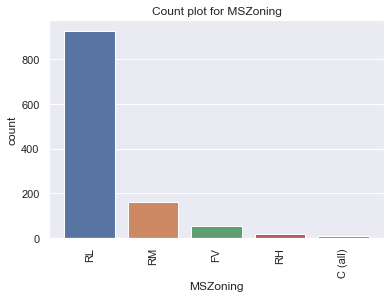

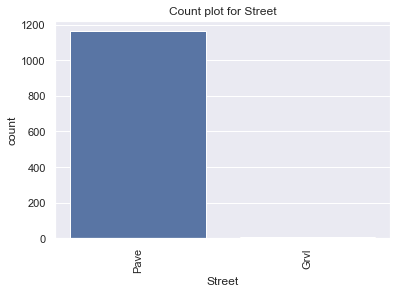

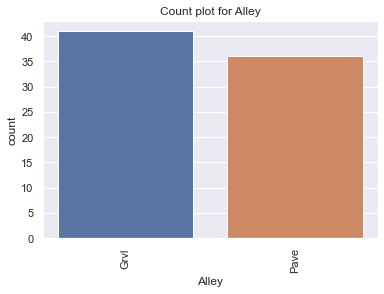

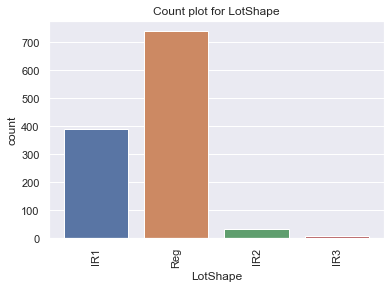

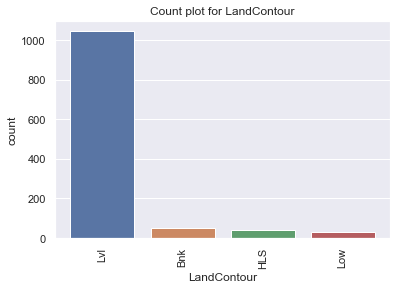

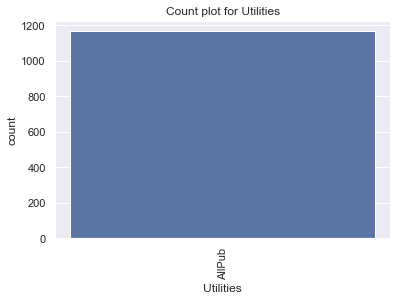

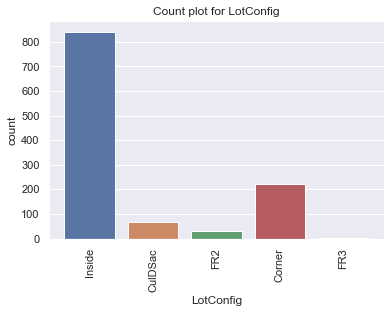

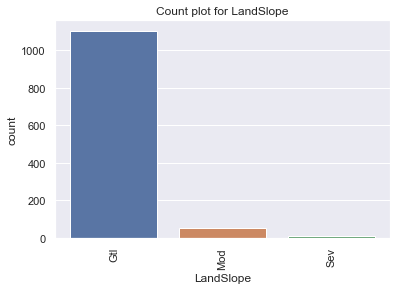

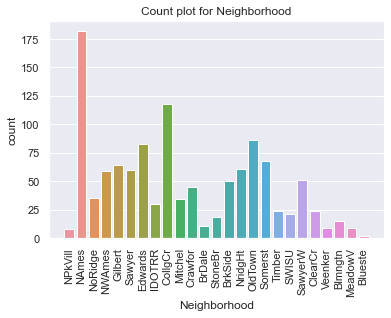

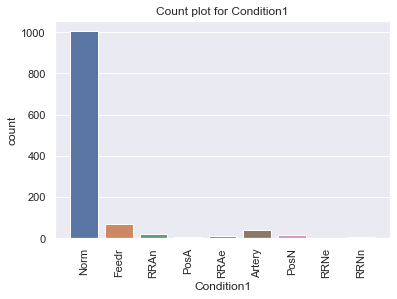

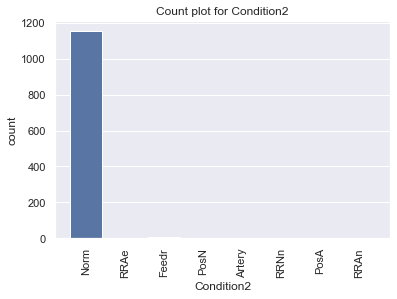

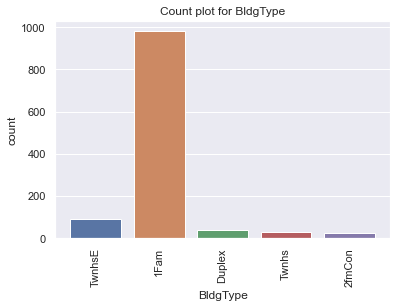

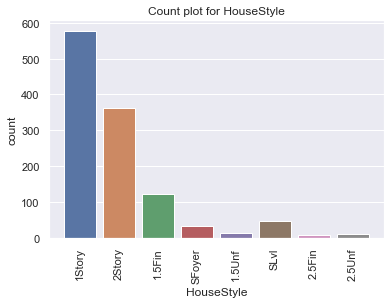

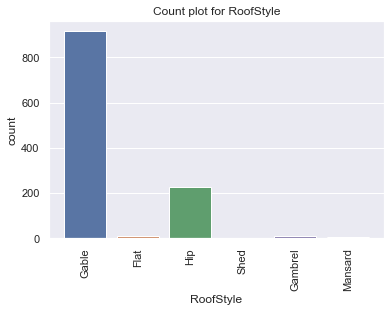

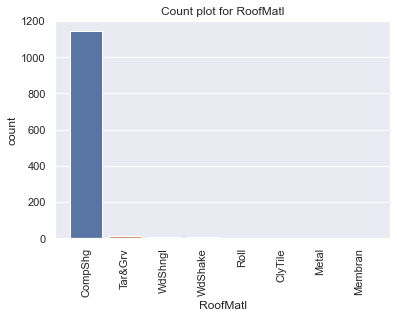

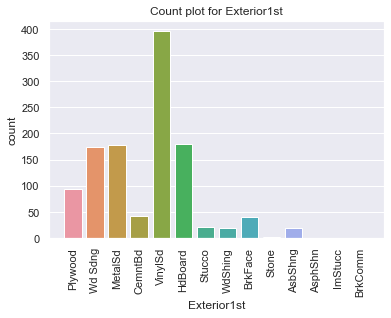

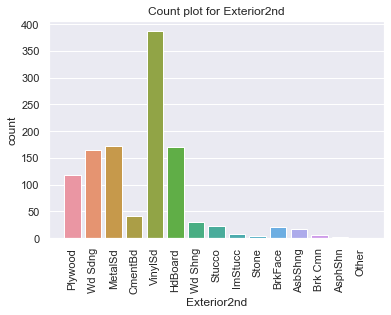

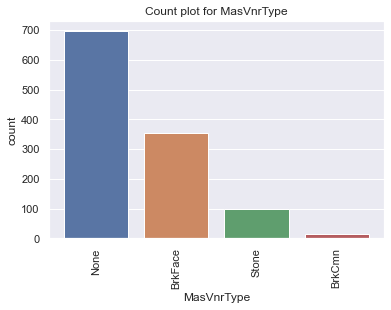

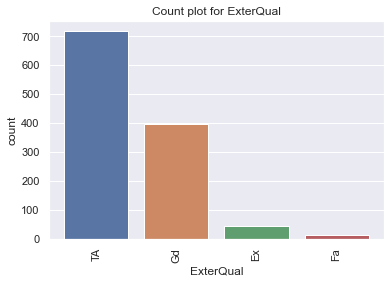

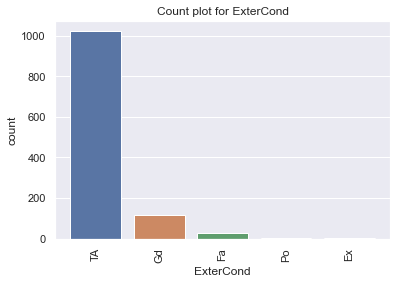

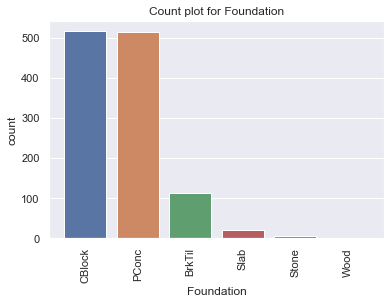

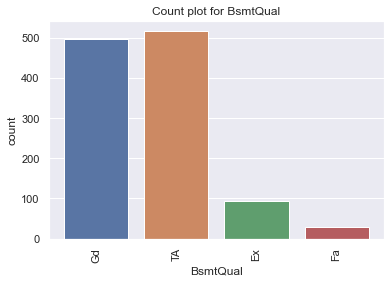

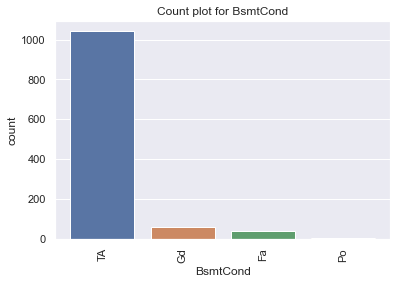

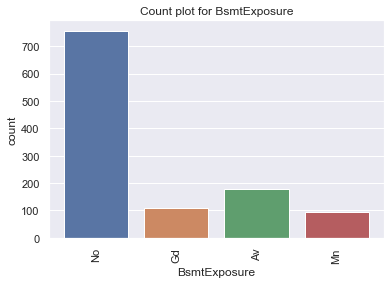

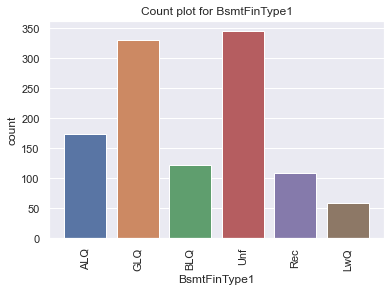

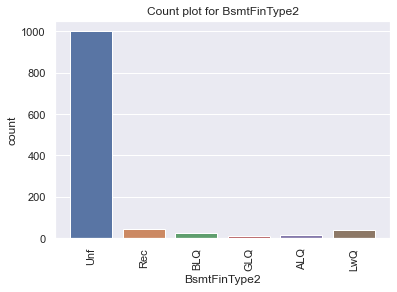

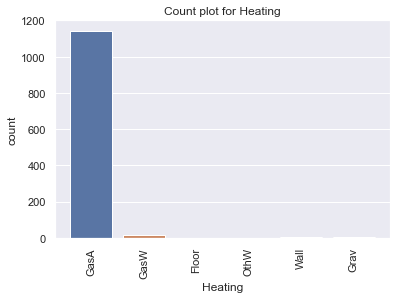

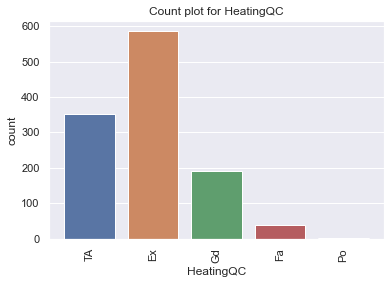

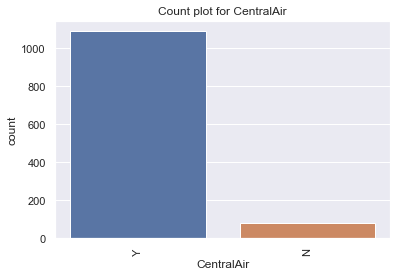

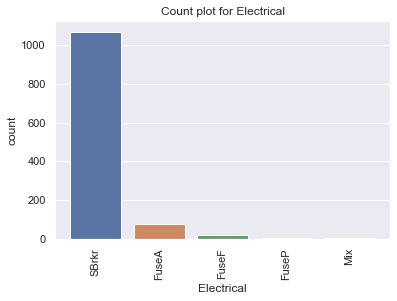

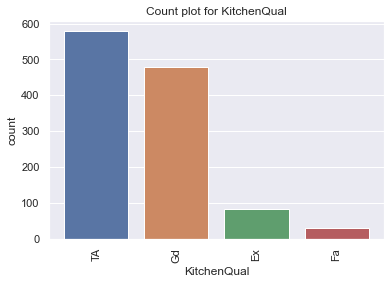

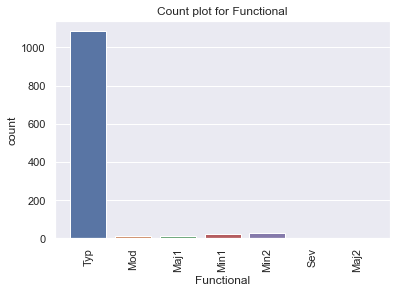

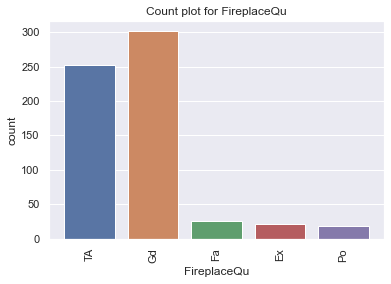

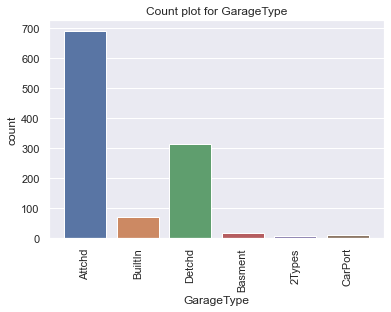

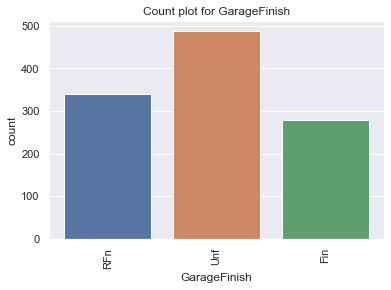

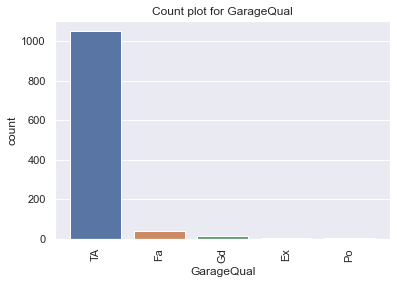

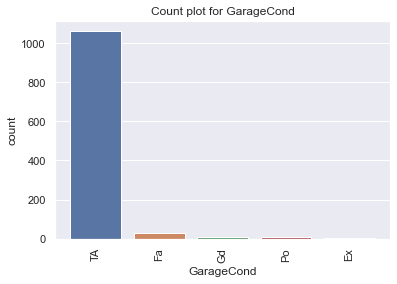

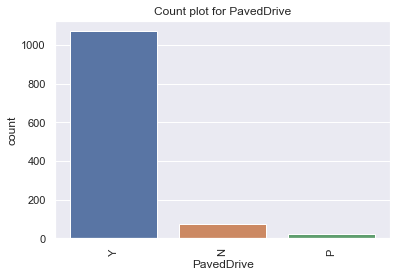

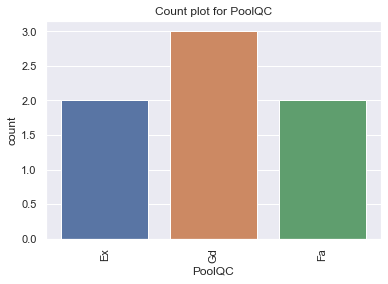

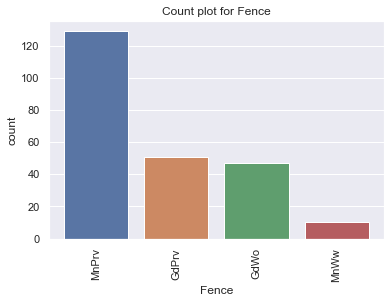

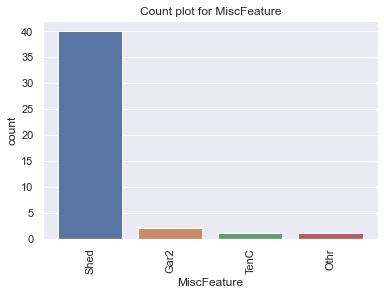

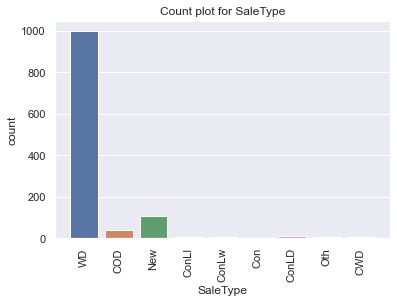

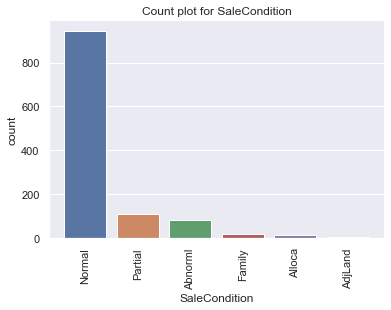

In [19]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for {i}")
    plt.plot()
    plt.show()

<Figure size 432x288 with 0 Axes>

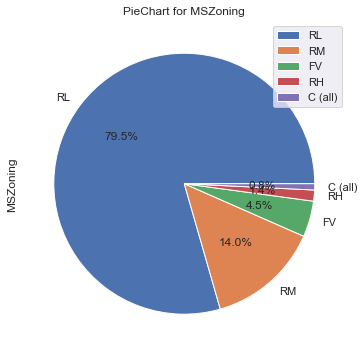

<Figure size 432x288 with 0 Axes>

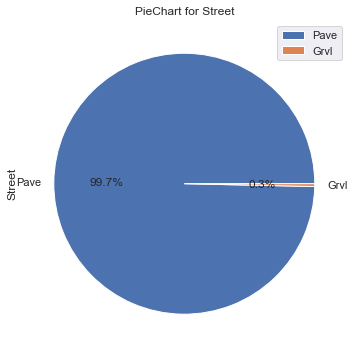

<Figure size 432x288 with 0 Axes>

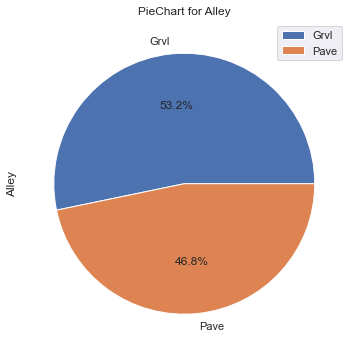

<Figure size 432x288 with 0 Axes>

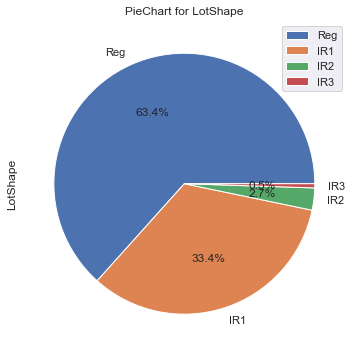

<Figure size 432x288 with 0 Axes>

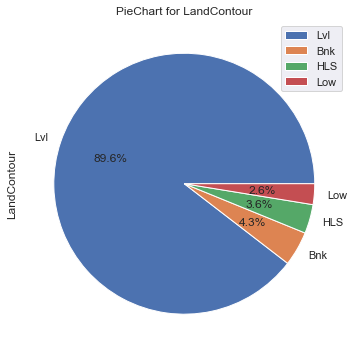

<Figure size 432x288 with 0 Axes>

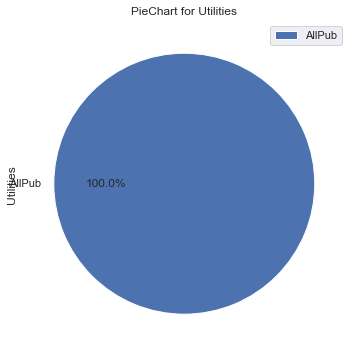

<Figure size 432x288 with 0 Axes>

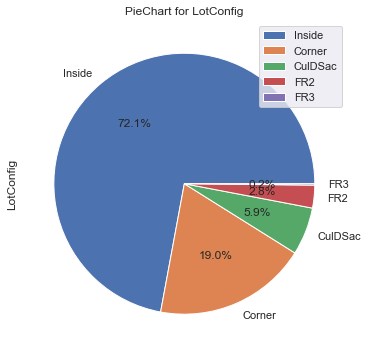

<Figure size 432x288 with 0 Axes>

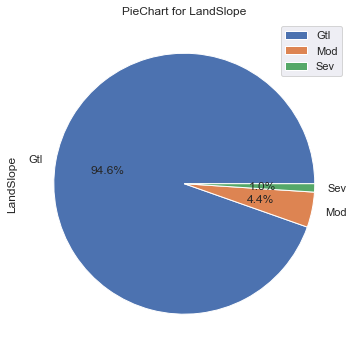

<Figure size 432x288 with 0 Axes>

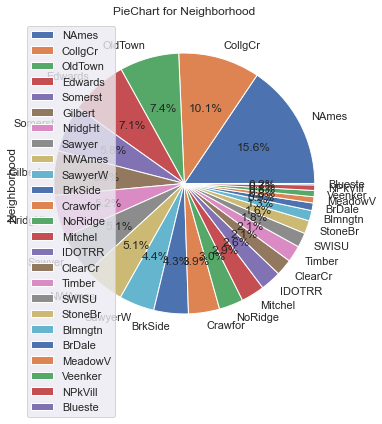

<Figure size 432x288 with 0 Axes>

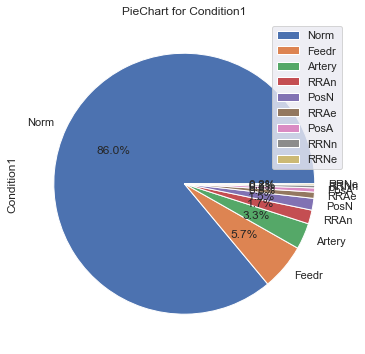

<Figure size 432x288 with 0 Axes>

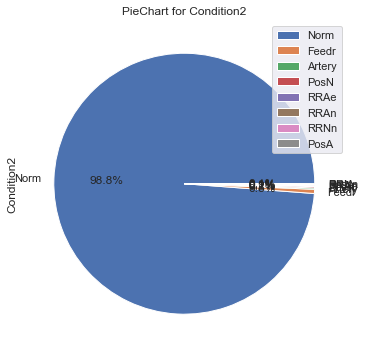

<Figure size 432x288 with 0 Axes>

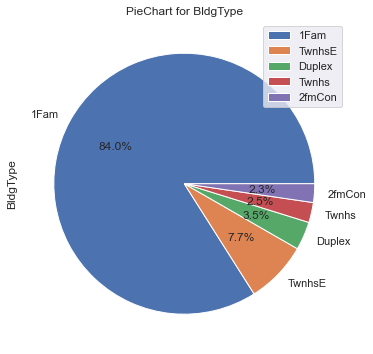

<Figure size 432x288 with 0 Axes>

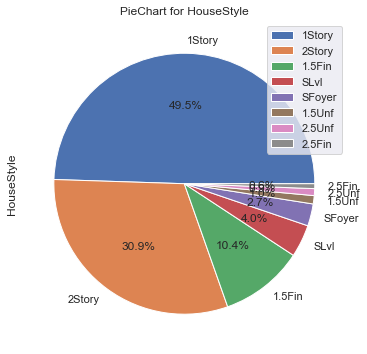

<Figure size 432x288 with 0 Axes>

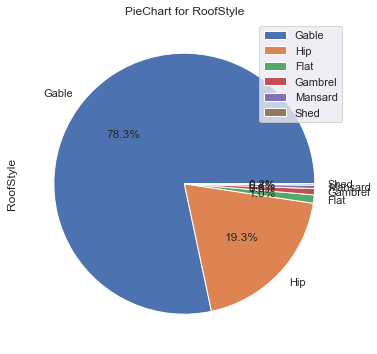

<Figure size 432x288 with 0 Axes>

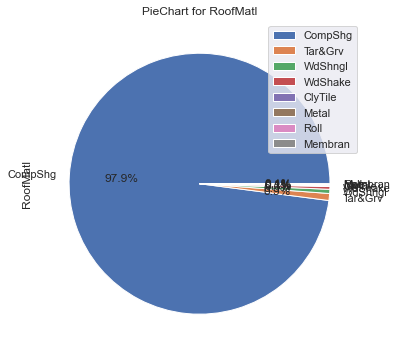

<Figure size 432x288 with 0 Axes>

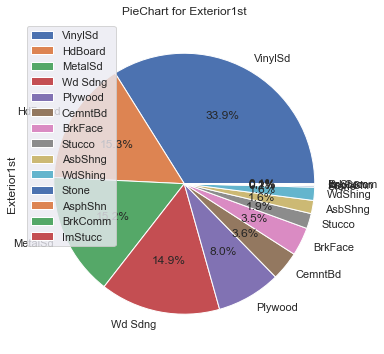

<Figure size 432x288 with 0 Axes>

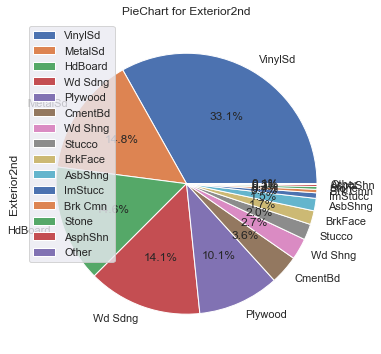

<Figure size 432x288 with 0 Axes>

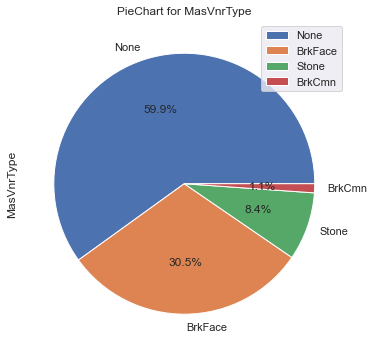

<Figure size 432x288 with 0 Axes>

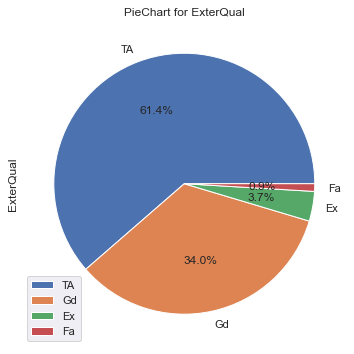

<Figure size 432x288 with 0 Axes>

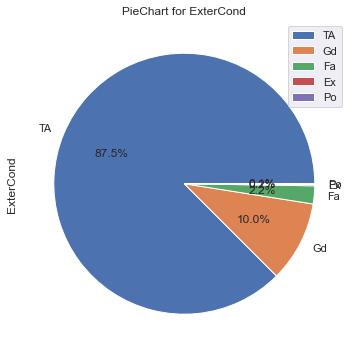

<Figure size 432x288 with 0 Axes>

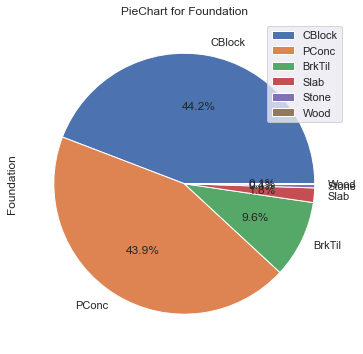

<Figure size 432x288 with 0 Axes>

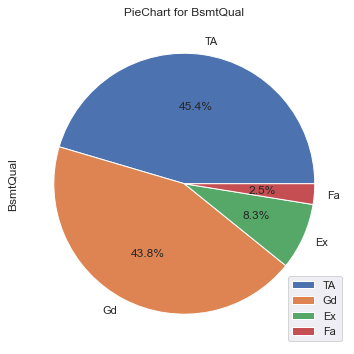

<Figure size 432x288 with 0 Axes>

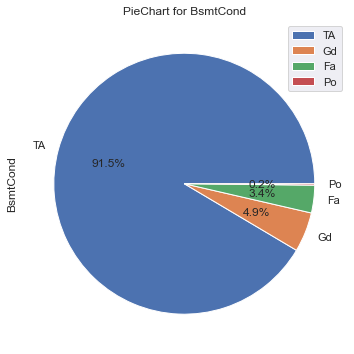

<Figure size 432x288 with 0 Axes>

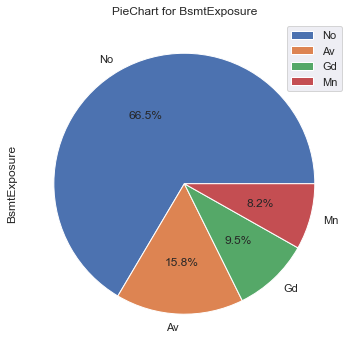

<Figure size 432x288 with 0 Axes>

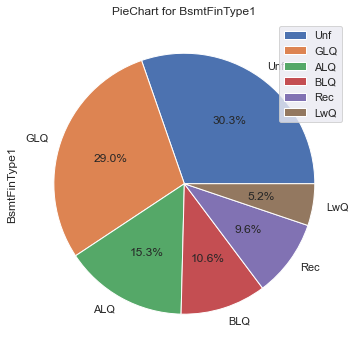

<Figure size 432x288 with 0 Axes>

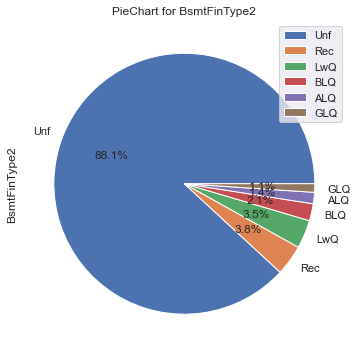

<Figure size 432x288 with 0 Axes>

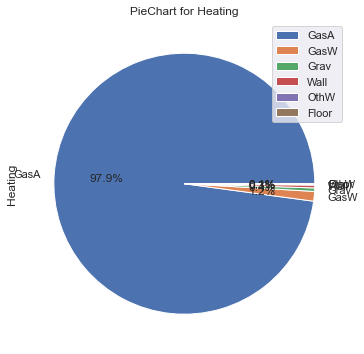

<Figure size 432x288 with 0 Axes>

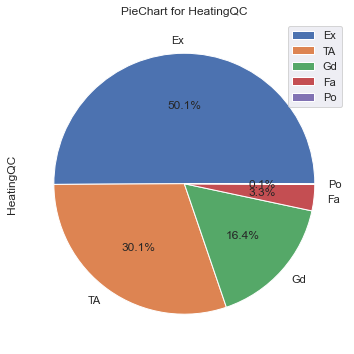

<Figure size 432x288 with 0 Axes>

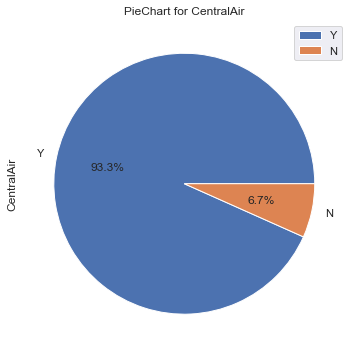

<Figure size 432x288 with 0 Axes>

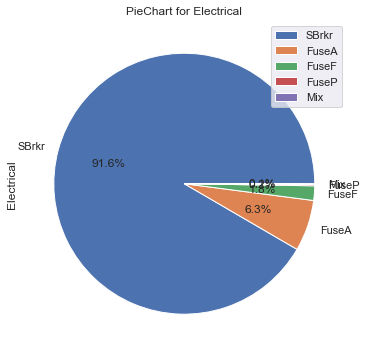

<Figure size 432x288 with 0 Axes>

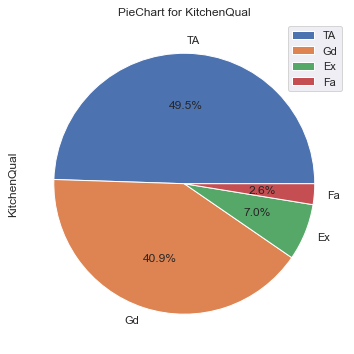

<Figure size 432x288 with 0 Axes>

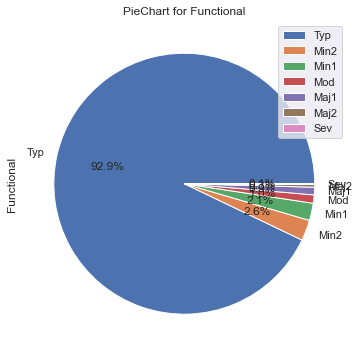

<Figure size 432x288 with 0 Axes>

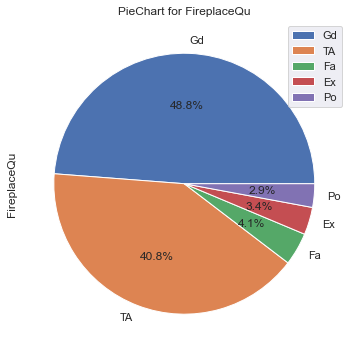

<Figure size 432x288 with 0 Axes>

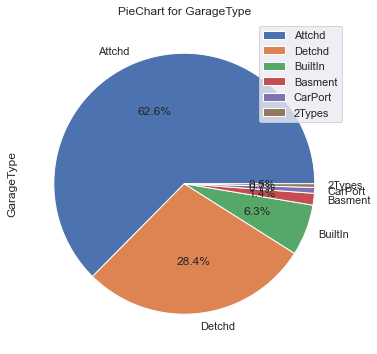

<Figure size 432x288 with 0 Axes>

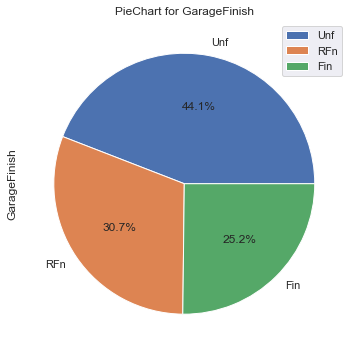

<Figure size 432x288 with 0 Axes>

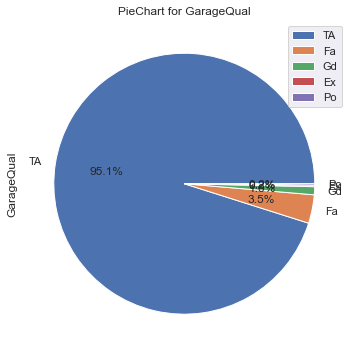

<Figure size 432x288 with 0 Axes>

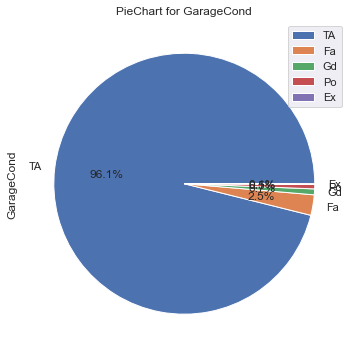

<Figure size 432x288 with 0 Axes>

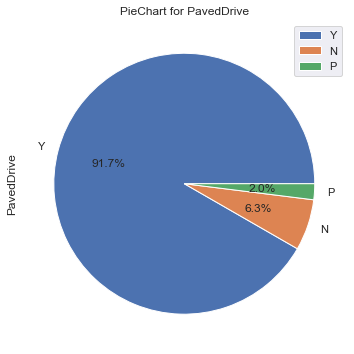

<Figure size 432x288 with 0 Axes>

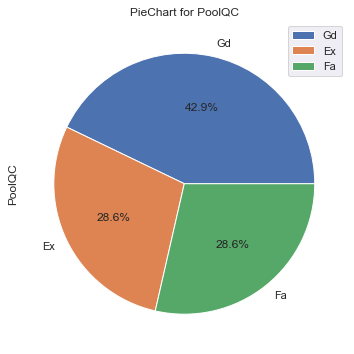

<Figure size 432x288 with 0 Axes>

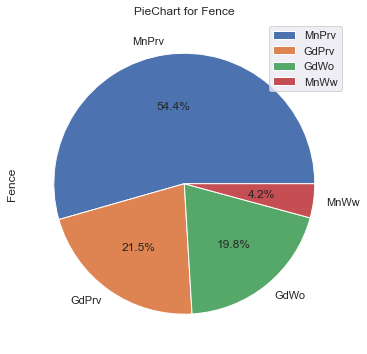

<Figure size 432x288 with 0 Axes>

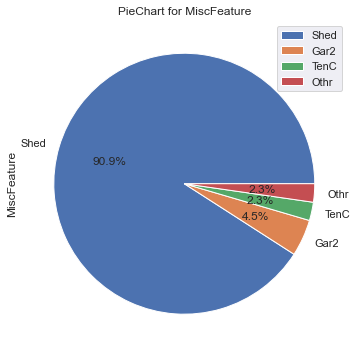

<Figure size 432x288 with 0 Axes>

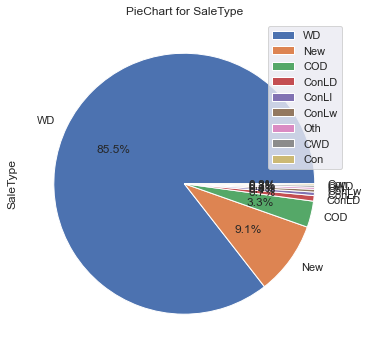

<Figure size 432x288 with 0 Axes>

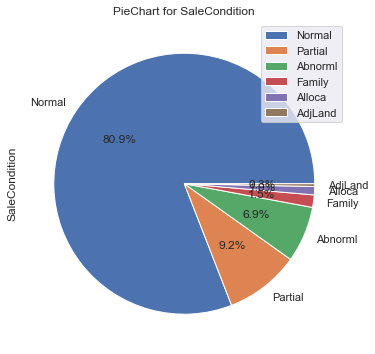

In [20]:
for i in catCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    countsDF= pd.DataFrame(df[i].value_counts())
    plot= countsDF.plot.pie(subplots=True,autopct="%.1f%%",figsize=(11,6))
    plt.title(f"PieChart for {i}")
    plt.plot()
    plt.show()

In [21]:
for i in numCol:
    print(i)
    print(df[i].nunique())
    print(df[i].value_counts())
    print("\n")

Id
1168
1       1
946     1
964     1
963     1
962     1
       ..
480     1
479     1
478     1
477     1
1460    1
Name: Id, Length: 1168, dtype: int64


MSSubClass
15
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64


LotFrontage
106
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
141.0      1
144.0      1
111.0      1
39.0       1
46.0       1
Name: LotFrontage, Length: 106, dtype: int64


LotArea
892
9600     21
7200     18
6000     16
8400     14
10800    11
         ..
11103     1
19296     1
12274     1
9060      1
8190      1
Name: LotArea, Length: 892, dtype: int64


OverallQual
10
5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


OverallCond
9
5    640
6    209
7    172
8     61
4     43
3     21
9     16
2      5
1  

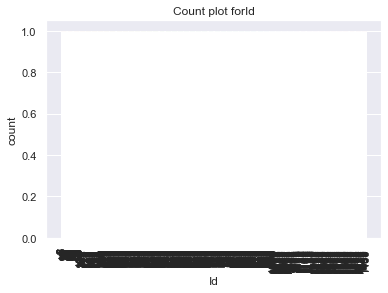

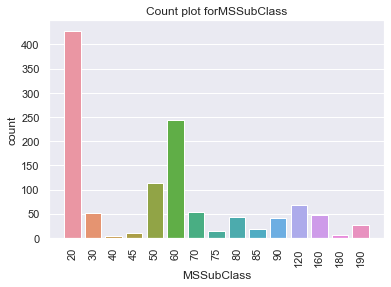

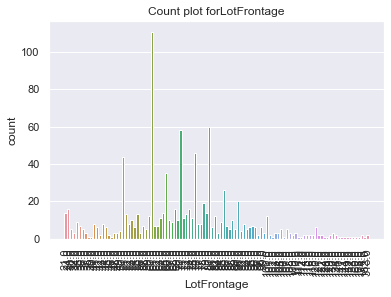

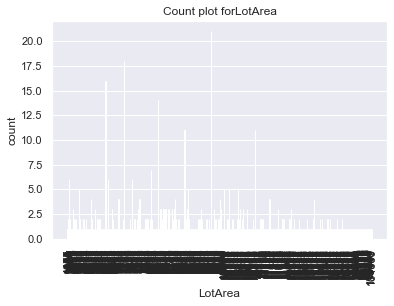

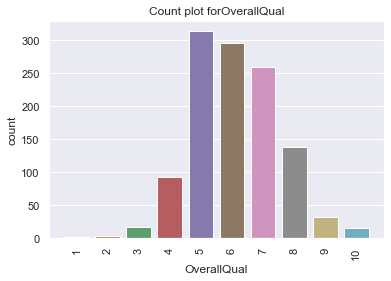

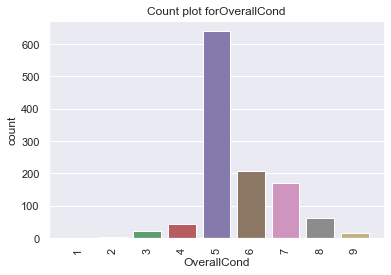

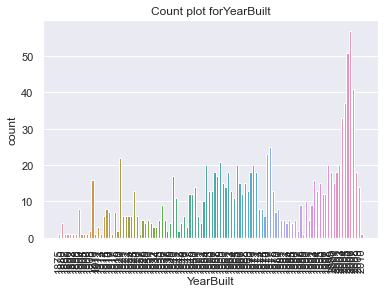

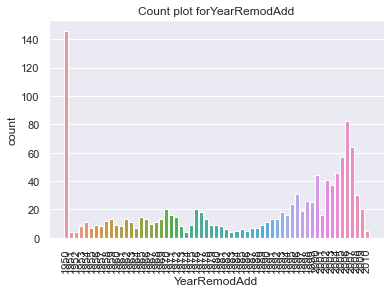

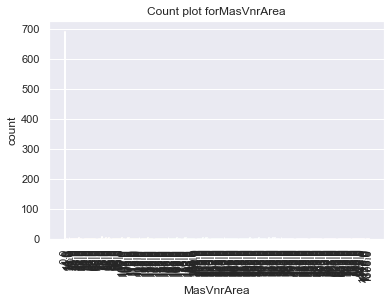

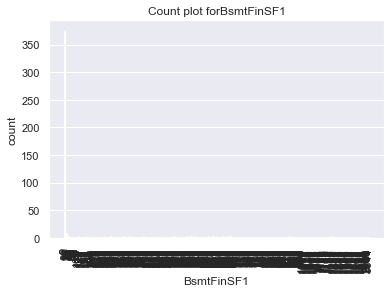

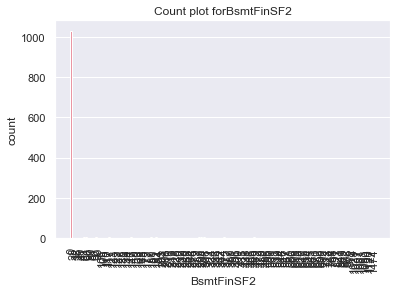

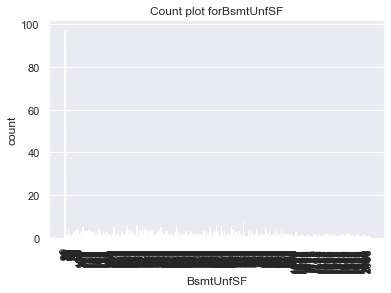

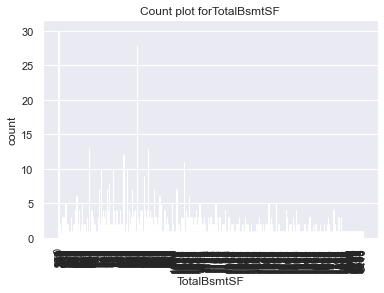

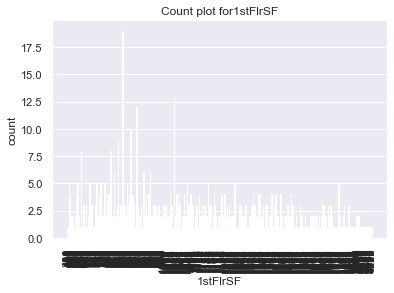

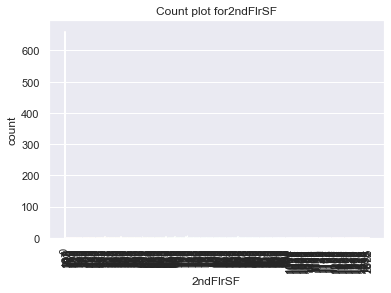

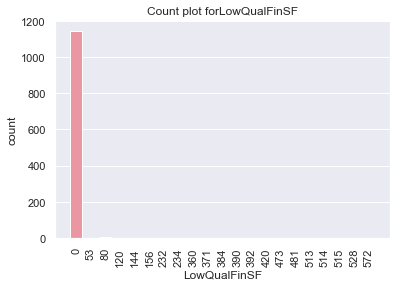

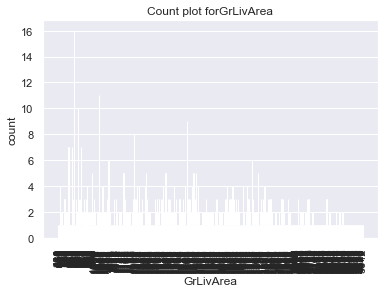

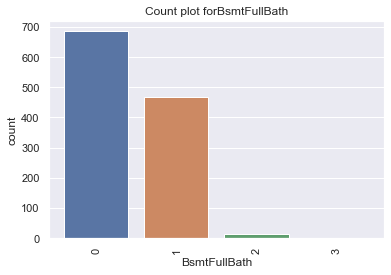

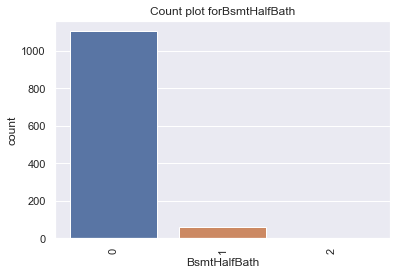

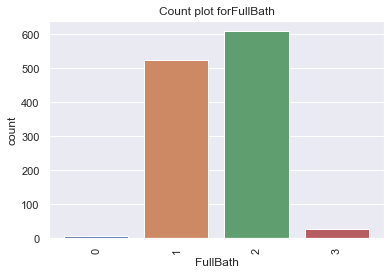

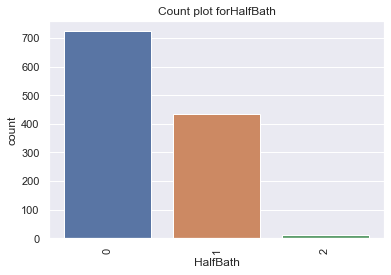

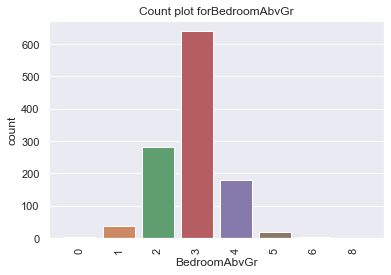

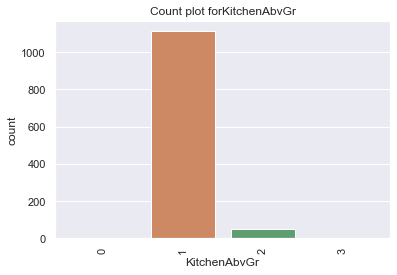

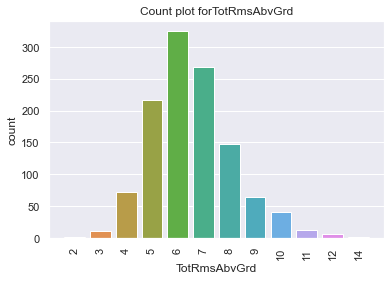

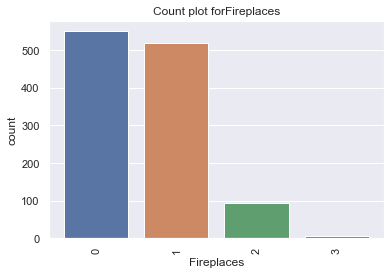

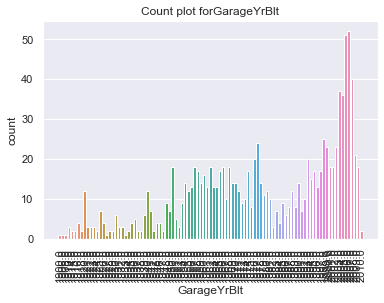

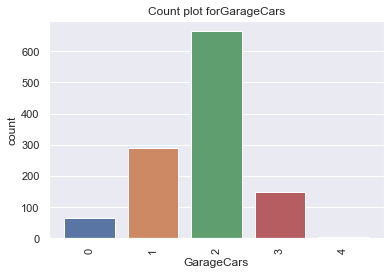

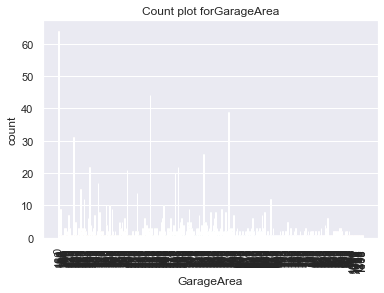

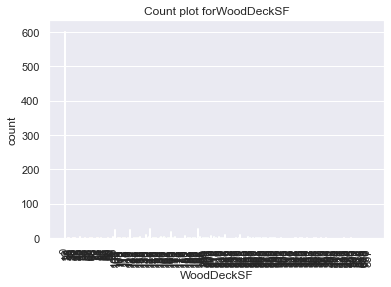

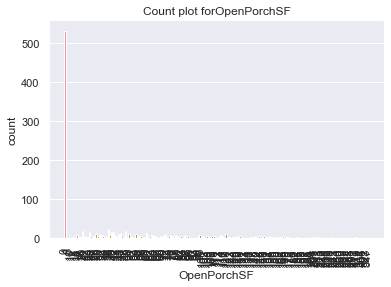

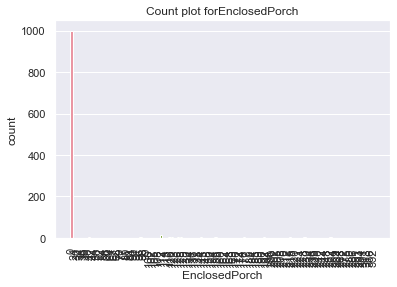

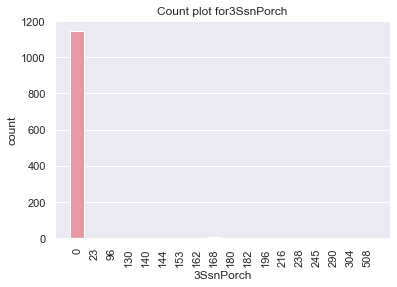

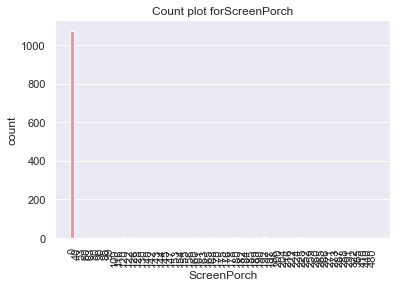

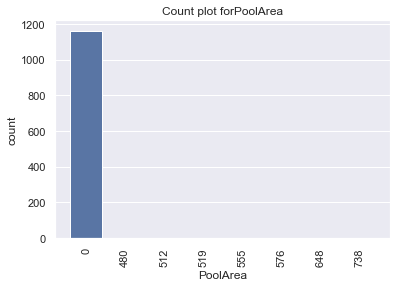

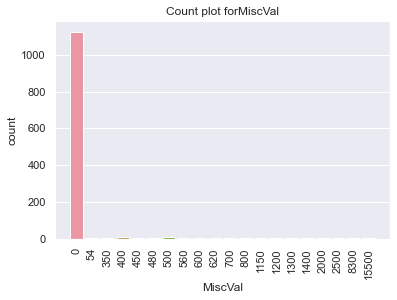

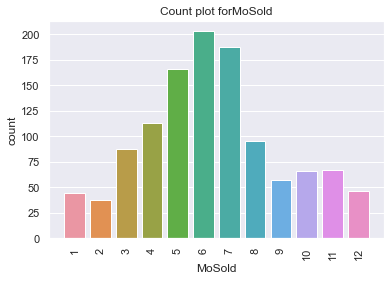

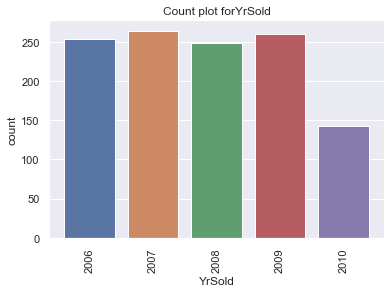

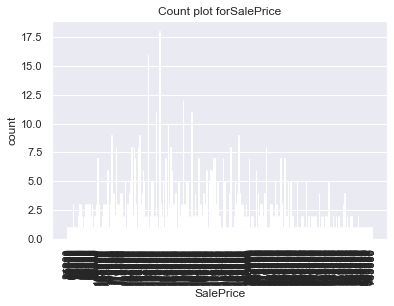

In [22]:
for i in numCol:
    plt.figure()
    sns.set_theme(style="darkgrid")
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.title(f"Count plot for{i}")
    plt.plot()
    plt.show()

Id


<Figure size 432x288 with 0 Axes>

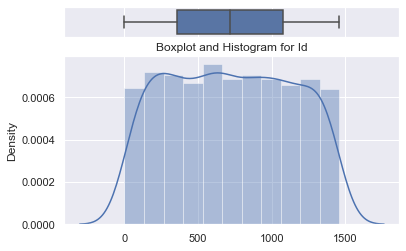

MSSubClass


<Figure size 432x288 with 0 Axes>

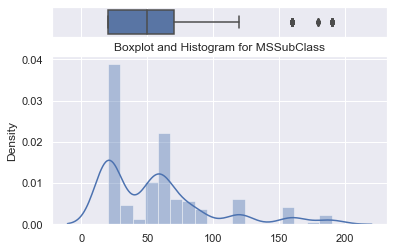

LotFrontage


<Figure size 432x288 with 0 Axes>

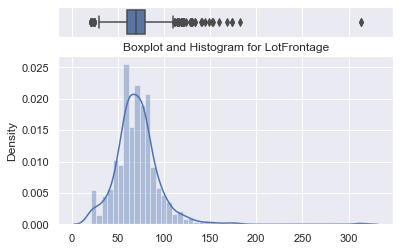

LotArea


<Figure size 432x288 with 0 Axes>

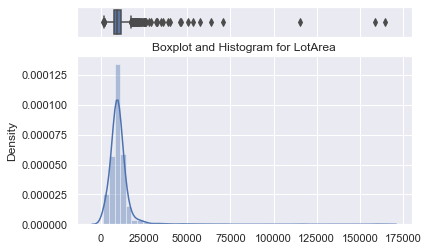

OverallQual


<Figure size 432x288 with 0 Axes>

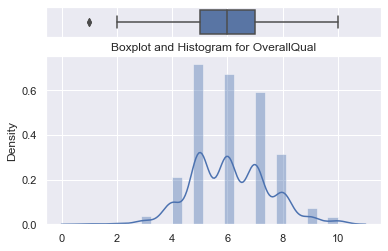

OverallCond


<Figure size 432x288 with 0 Axes>

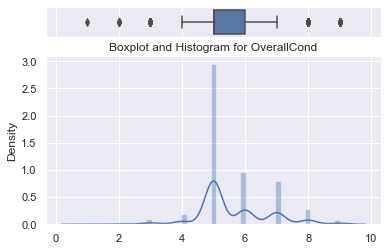

YearBuilt


<Figure size 432x288 with 0 Axes>

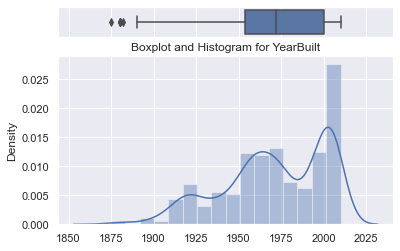

YearRemodAdd


<Figure size 432x288 with 0 Axes>

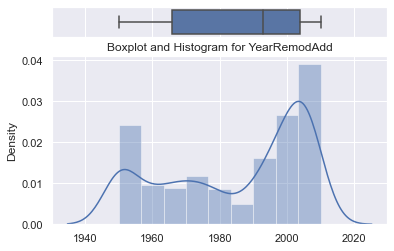

MasVnrArea


<Figure size 432x288 with 0 Axes>

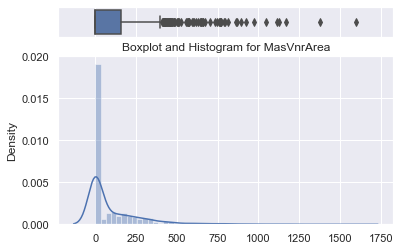

BsmtFinSF1


<Figure size 432x288 with 0 Axes>

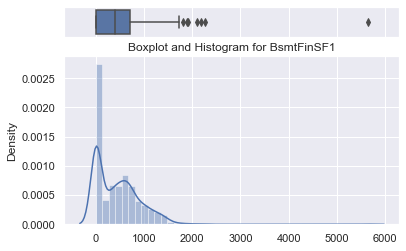

BsmtFinSF2


<Figure size 432x288 with 0 Axes>

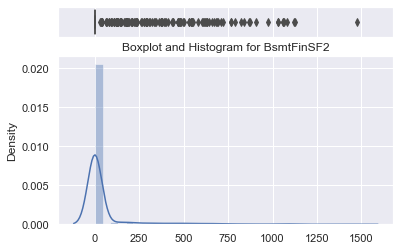

BsmtUnfSF


<Figure size 432x288 with 0 Axes>

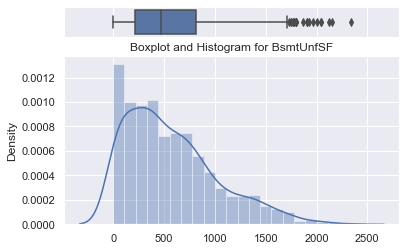

TotalBsmtSF


<Figure size 432x288 with 0 Axes>

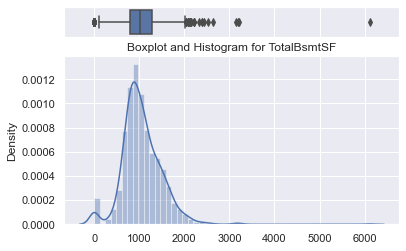

1stFlrSF


<Figure size 432x288 with 0 Axes>

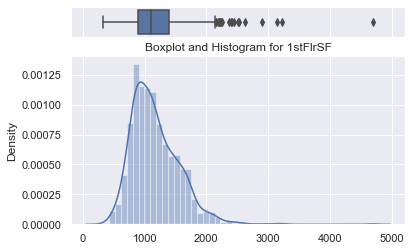

2ndFlrSF


<Figure size 432x288 with 0 Axes>

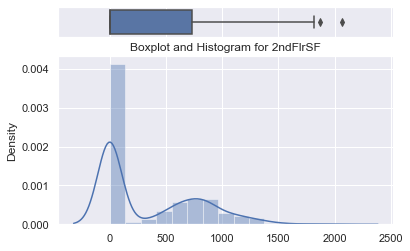

LowQualFinSF


<Figure size 432x288 with 0 Axes>

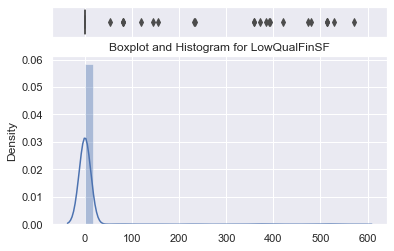

GrLivArea


<Figure size 432x288 with 0 Axes>

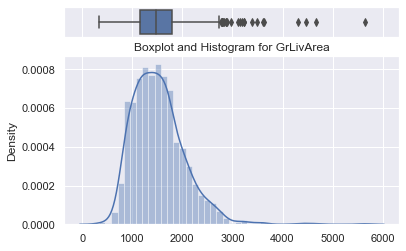

BsmtFullBath


<Figure size 432x288 with 0 Axes>

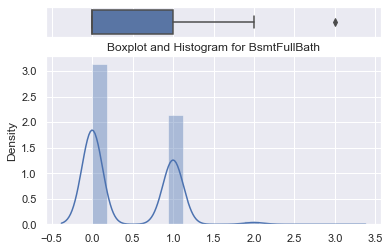

BsmtHalfBath


<Figure size 432x288 with 0 Axes>

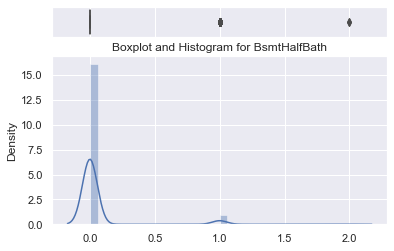

FullBath


<Figure size 432x288 with 0 Axes>

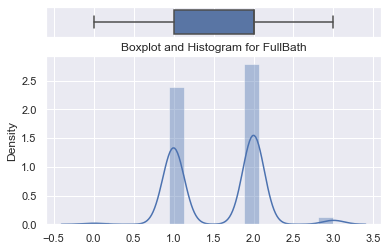

HalfBath


<Figure size 432x288 with 0 Axes>

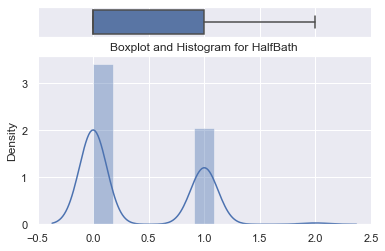

BedroomAbvGr


<Figure size 432x288 with 0 Axes>

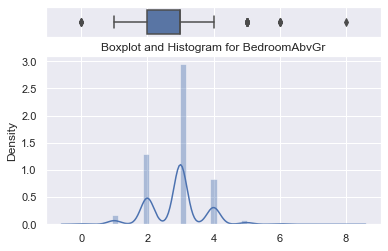

KitchenAbvGr


<Figure size 432x288 with 0 Axes>

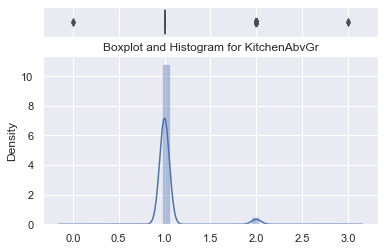

TotRmsAbvGrd


<Figure size 432x288 with 0 Axes>

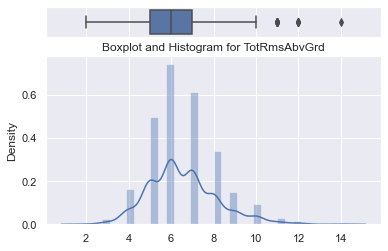

Fireplaces


<Figure size 432x288 with 0 Axes>

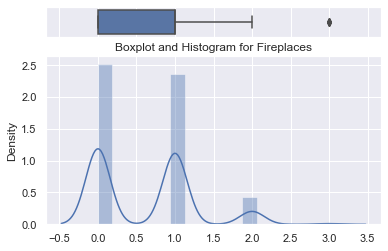

GarageYrBlt


<Figure size 432x288 with 0 Axes>

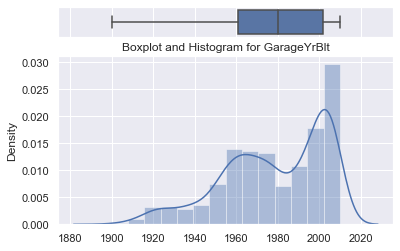

GarageCars


<Figure size 432x288 with 0 Axes>

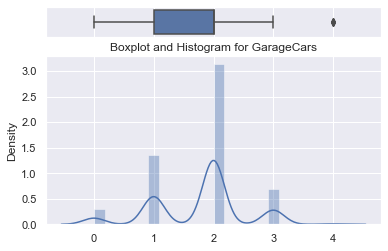

GarageArea


<Figure size 432x288 with 0 Axes>

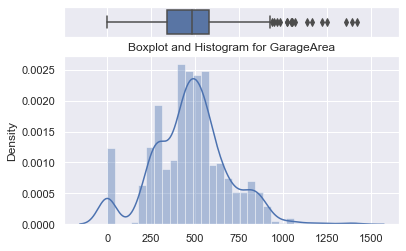

WoodDeckSF


<Figure size 432x288 with 0 Axes>

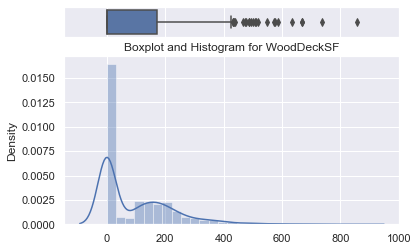

OpenPorchSF


<Figure size 432x288 with 0 Axes>

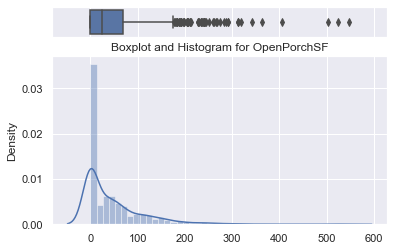

EnclosedPorch


<Figure size 432x288 with 0 Axes>

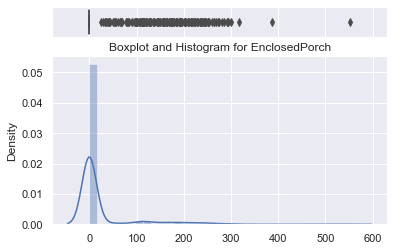

3SsnPorch


<Figure size 432x288 with 0 Axes>

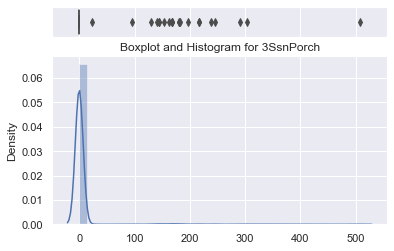

ScreenPorch


<Figure size 432x288 with 0 Axes>

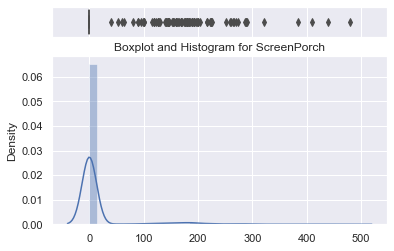

PoolArea


<Figure size 432x288 with 0 Axes>

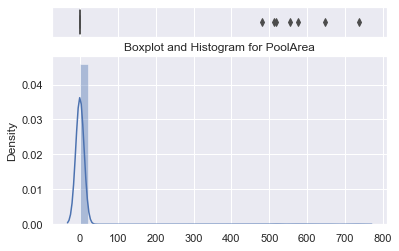

MiscVal


<Figure size 432x288 with 0 Axes>

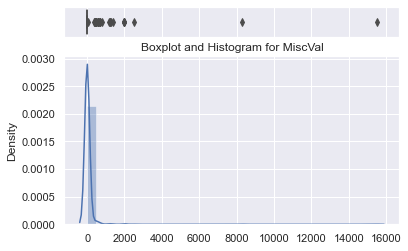

MoSold


<Figure size 432x288 with 0 Axes>

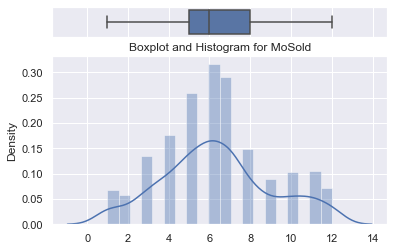

YrSold


<Figure size 432x288 with 0 Axes>

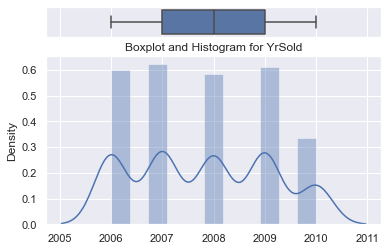

SalePrice


<Figure size 432x288 with 0 Axes>

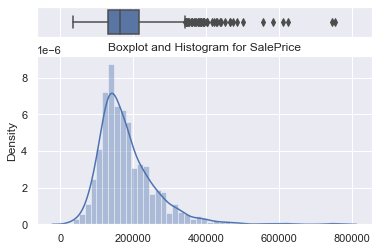

In [23]:
for i in numCol:
    print(i)
    plt.figure()
    sns.set_theme(style="darkgrid")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
    sns.boxplot(x = df[i],ax=ax_box)
    #sns.histplot (data=df, x=i, ax=ax_hist)
    sns.distplot(x= df[i],ax=ax_hist)
    ax_box.set(xlabel='')
    plt.plot()
    plt.title(f"Boxplot and Histogram for {i}")
    plt.show()

In [24]:
pd.DataFrame(df.skew(axis=0,skipna=True))

0
Id              0.026526
MSSubClass      1.422019
LotFrontage     2.450241
LotArea        10.659285
OverallQual     0.175082
OverallCond     0.580714
YearBuilt      -0.579204
YearRemodAdd   -0.495864
MasVnrArea      2.826173
BsmtFinSF1      1.871606
BsmtFinSF2      4.365829
BsmtUnfSF       0.909057
TotalBsmtSF     1.744591
1stFlrSF        1.513707
2ndFlrSF        0.823479
LowQualFinSF    8.666142
GrLivArea       1.449952
BsmtFullBath    0.627106
BsmtHalfBath    4.264403
FullBath        0.057809
HalfBath        0.656492
BedroomAbvGr    0.243855
KitchenAbvGr    4.365259
TotRmsAbvGrd    0.644657
Fireplaces      0.671966
GarageYrBlt    -0.644564
GarageCars     -0.358556
GarageArea      0.189665
WoodDeckSF      1.504929
OpenPorchSF     2.410840
EnclosedPorch   3.043610
3SsnPorch       9.770611
ScreenPorch     4.105741
PoolArea       13.243711
MiscVal        23.065943
MoSold          0.220979
YrSold          0.115765
SalePrice       1.953878

# Data Scaling

In [27]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [28]:
df_num=pd.DataFrame(imp_median.fit_transform(df[numCol]), columns=numCol)
df_cat=pd.DataFrame(imp_mode.fit_transform(df[catCol]),columns=catCol)

In [29]:
df=pd.concat([df_num,df_cat],axis=1)

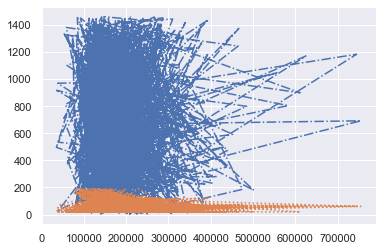

In [30]:
plt.plot(df["SalePrice"],df["Id"],label="Line1",linestyle="-.")
plt.plot(df["SalePrice"],df["MSSubClass"],label="Line2",linestyle=":")
plt.plot();

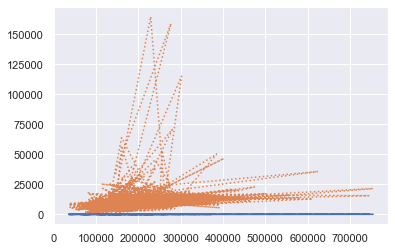

In [31]:
plt.plot(df["SalePrice"],df["LotFrontage"],label="Line1",linestyle="-.")
plt.plot(df["SalePrice"],df["LotArea"],label="Line2",linestyle=":")
plt.plot();

# Matplotlib-Pandas

In [34]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

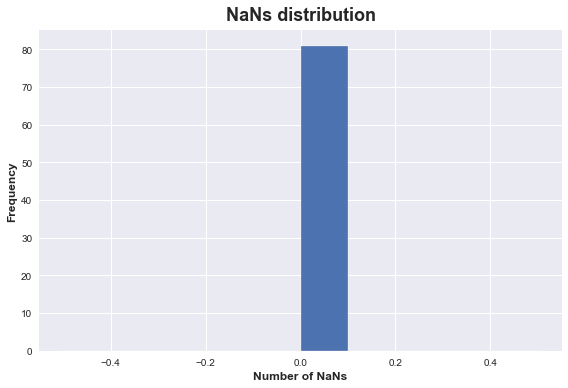

In [37]:
df.isna().sum().plot(kind='hist')
plt.xlabel("Number of NaNs")
plt.title('NaNs distribution', fontsize=18);

In [38]:
threshold = 800
print(f"Columns with grater than {threshold} NaNs, {round((threshold/train_df.shape[0]) * 100)}% of it's values are NaNs.")

Columns with grater than 800 NaNs, 68% of it's values are NaNs.


In [39]:
outliers = train_df.isna().sum()[train_df.isna().sum() > threshold]
outliers

Alley          1091
PoolQC         1161
Fence           931
MiscFeature    1124
dtype: int64

In [40]:
train_df.duplicated().sum()

0

In [41]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    70.807363   10484.749144     6.104452   
std     416.159877    41.940650    22.440317    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    70.000000    9522.500000     6.000000   
75%    1079.500000    70.000000    79.250000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   101.696918   444.726027  ...   
std       1.124343    30.145255     20.785185   182.218483   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

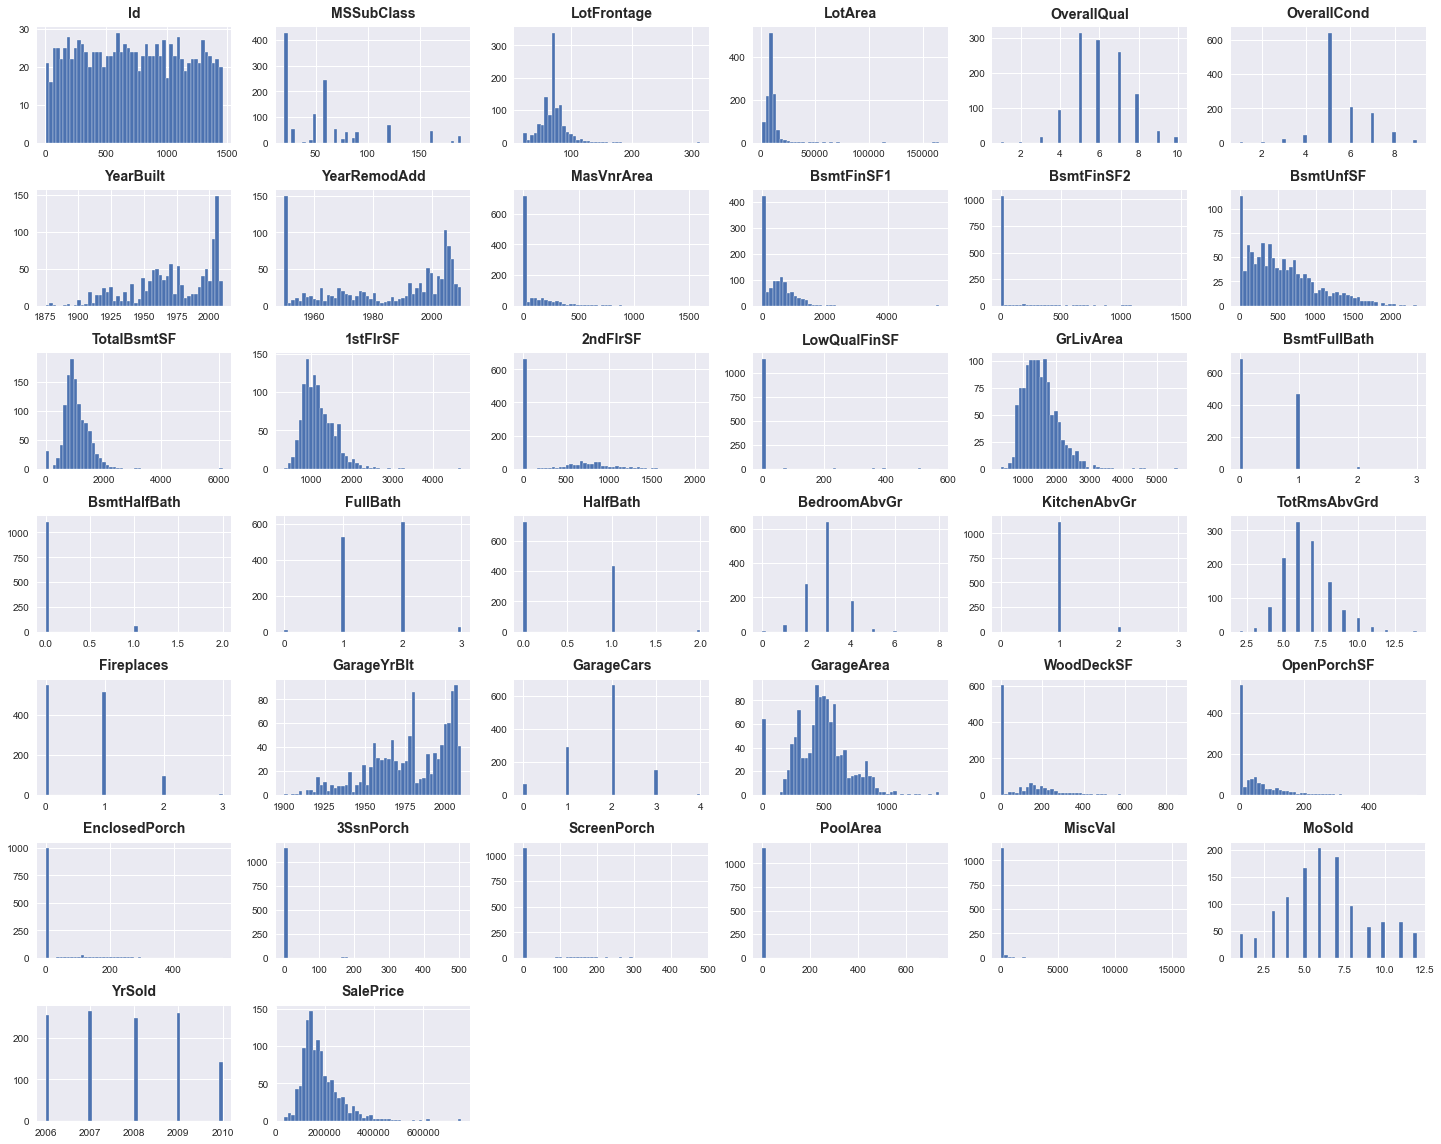

In [42]:
df.hist(bins=50, figsize=(20,16));

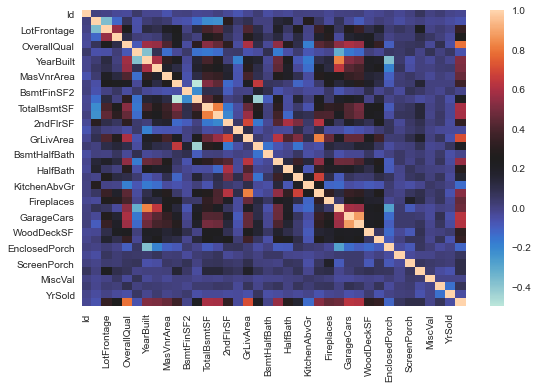

In [43]:
sns.heatmap(train_df.corr(), annot=False, cmap='icefire');

In [44]:
df.corr().unstack().sort_values(ascending=False).drop_duplicates()[:24]

Id            Id              1.000000
GarageArea    GarageCars      0.877542
TotRmsAbvGrd  GrLivArea       0.821845
TotalBsmtSF   1stFlrSF        0.813357
SalePrice     OverallQual     0.789185
GarageYrBlt   YearBuilt       0.779860
SalePrice     GrLivArea       0.707300
2ndFlrSF      GrLivArea       0.684802
BedroomAbvGr  TotRmsAbvGrd    0.672542
BsmtFinSF1    BsmtFullBath    0.645126
SalePrice     GarageCars      0.628329
GrLivArea     FullBath        0.626275
2ndFlrSF      TotRmsAbvGrd    0.619871
GarageArea    SalePrice       0.619000
GarageYrBlt   YearRemodAdd    0.612726
GrLivArea     OverallQual     0.599700
2ndFlrSF      HalfBath        0.597111
GarageCars    OverallQual     0.596322
SalePrice     TotalBsmtSF     0.595042
YearRemodAdd  YearBuilt       0.592829
1stFlrSF      SalePrice       0.587642
YearBuilt     OverallQual     0.575800
GarageArea    OverallQual     0.566782
1stFlrSF      GrLivArea       0.566049
dtype: float64

In [45]:
df.corrwith(train_df['SalePrice']).sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.460535
Fireplaces       0.459611
GarageYrBlt      0.453840
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323851
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
Id              -0.023897
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
dtype: float

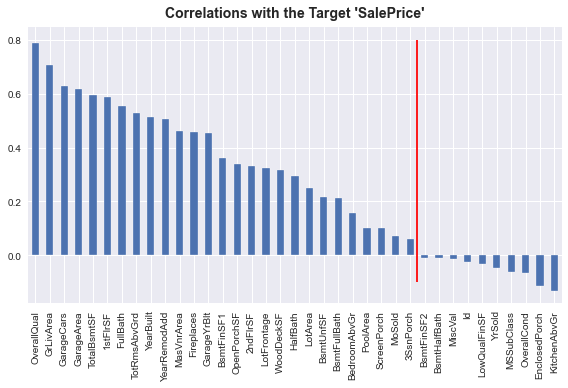

In [46]:
df.corrwith(train_df['SalePrice']).sort_values(ascending=False)[1:].plot(kind='bar')
plt.vlines(26.5, -0.1, 0.8, colors='red')
plt.title("Correlations with the Target 'SalePrice'");

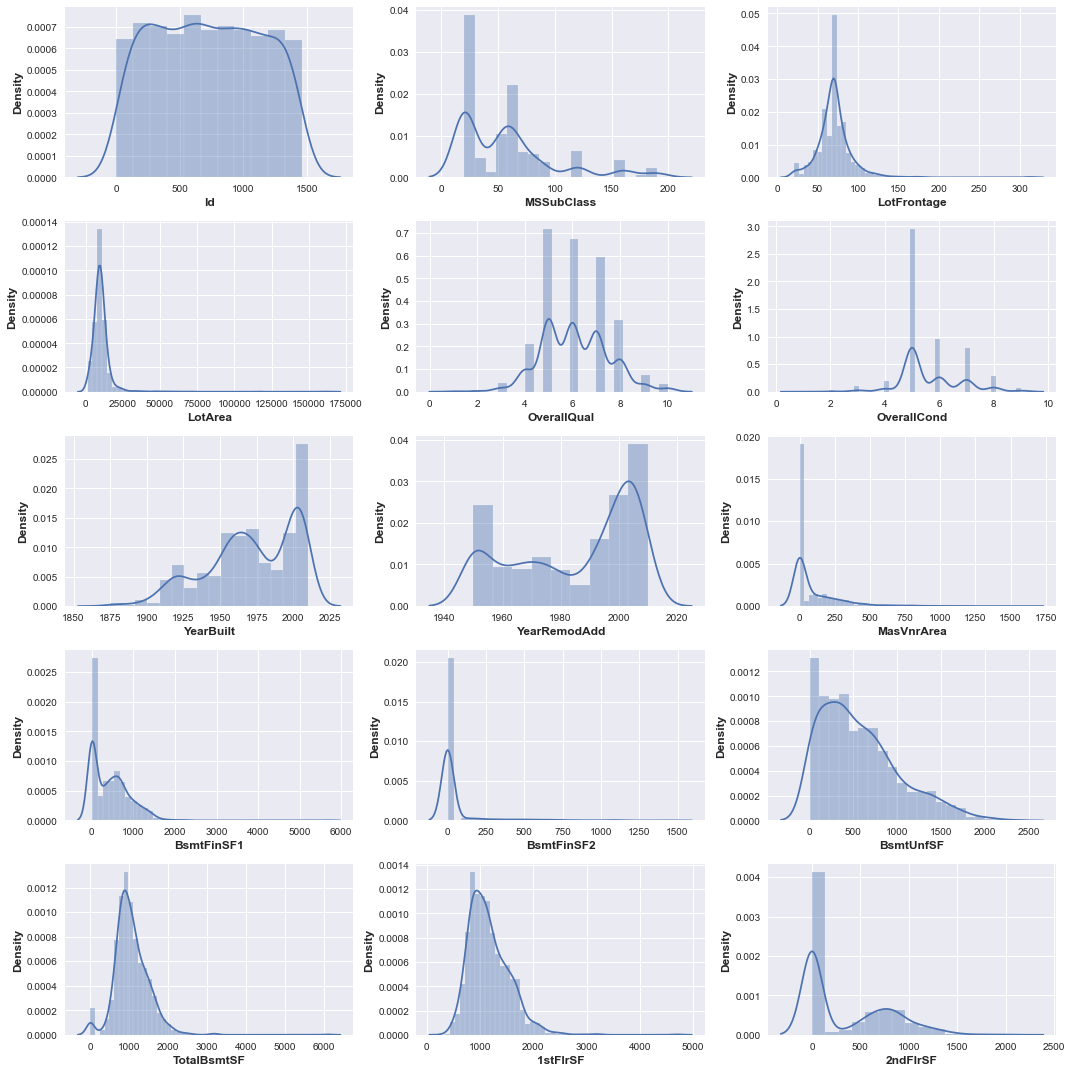

In [48]:
numerical = df._get_numeric_data().columns
def plotHist():
    fig, ax =plt.subplots(5,3, figsize=(15,15))
    i=0;j=0;k=0
    while i<=4:
        while j<=2:
            sns.distplot(df[numerical[k]], ax=ax[i, j])
            j+=1;k+=1
        j=0;i+=1; 
    plt.savefig('distribution_before_removing_missing_values_from_numerical_columns.png')
    plt.show()
plotHist()

# Checking outliers in Numerical columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


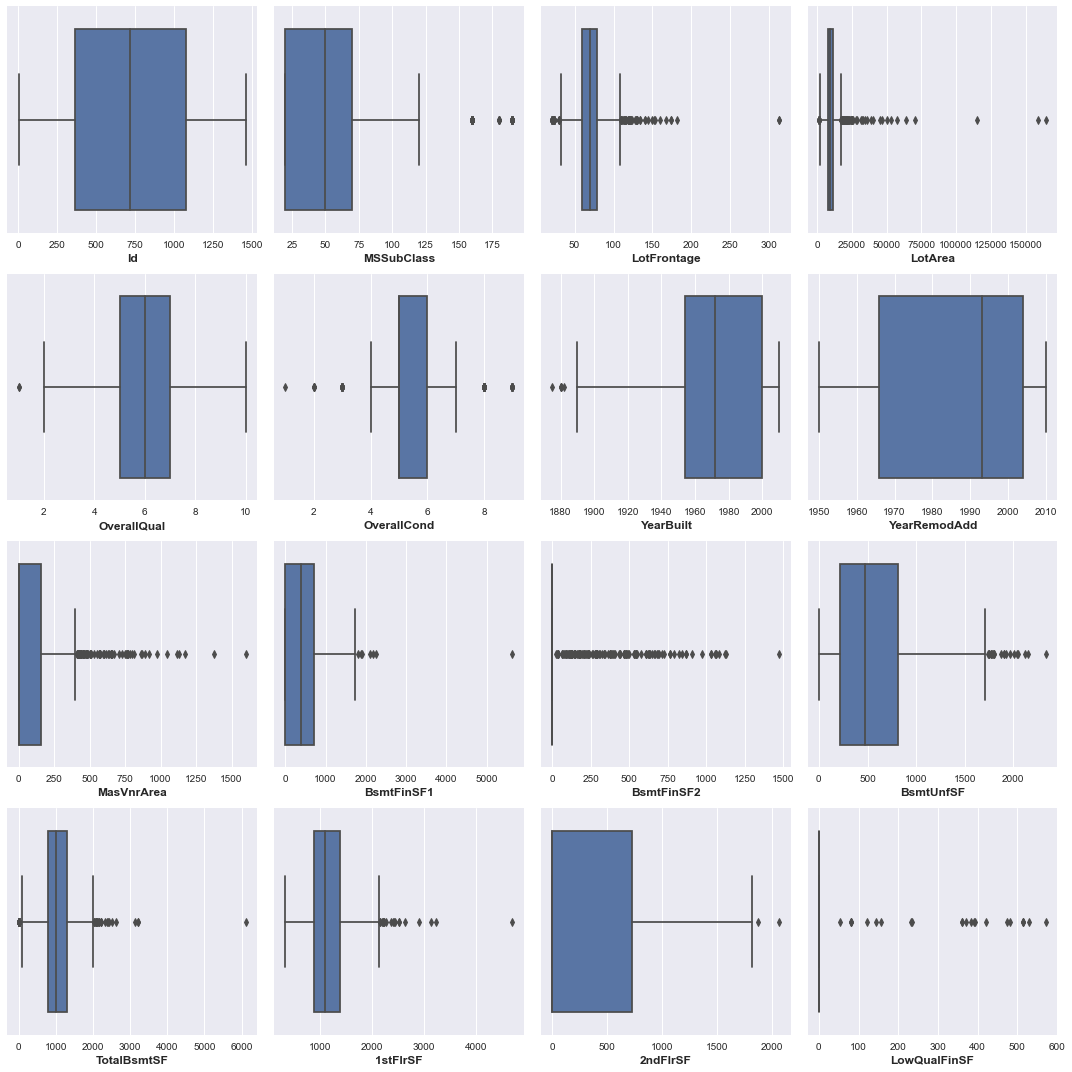

In [49]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('before_removing_outliers_from_numerical_columns.png')
plt.show()

# Removing Outliers

In [50]:
lsUpper = []
lsLower = []
def removeOutliers(numerical):
    for i in range(len(numerical)):
        q1 = df[numerical[i]].quantile(0.25)
        q3 = df[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        df.loc[(df[numerical[i]] <= minimum), numerical[i]] = minimum
        df.loc[(df[numerical[i]] >= maximum), numerical[i]] = maximum  
removeOutliers(numerical)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


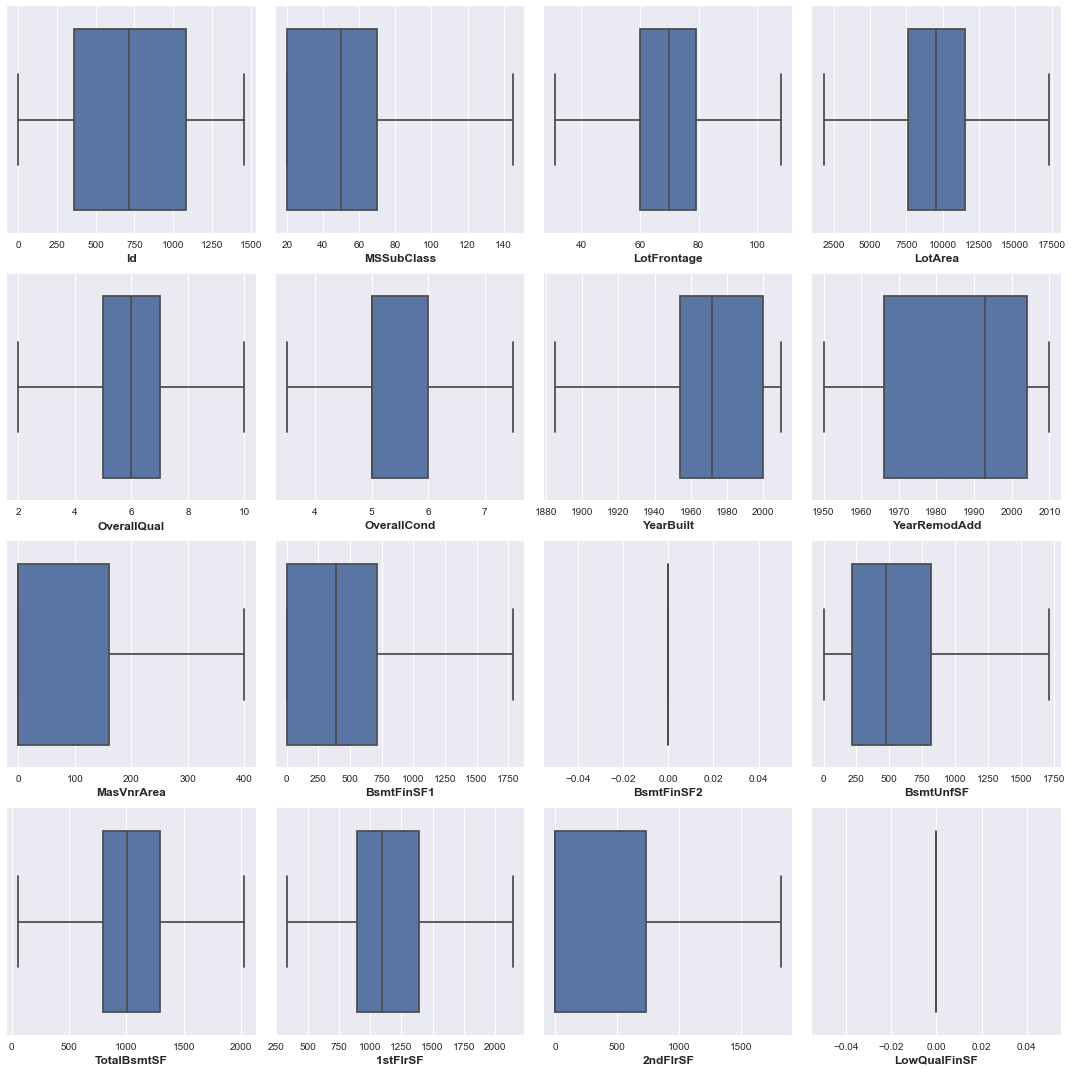

In [51]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('after_removing_outliers_from_numerical_columns.png')
plt.show()

In [56]:
X = train_df.drop(columns=['SalePrice'])
y = train_df.SalePrice

In [57]:
less_than_0_corr = train_df.corrwith(train_df['SalePrice'])[train_df.corrwith(train_df['SalePrice']) < 0].index.to_list()
cols_to_remove = list(outliers.index) + less_than_0_corr

In [58]:
num_df = X.select_dtypes(include='number')
num_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120          NaN     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  WoodDeckSF  \
0          1976         0.0         120  ...         440           0   
1          1970         0.0         351  ...         621          81   
2          1997         0.0         862  ...         455         180   
3          1977       480.0         705  ...         546           0   
4          2000       126.0        1246  ...         529         240   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0          205              0          0            0         0        0   
1          207              0          0          224         0        0   
2          130              0          0            0         0        0   
3          122              0          0            0         0        0   
4            0              0          0            0         0        0   

   MoSold  YrSold  
0       2    2007  
1      10    2007  
2       6    2007  
3       1    2010  
4       6    2009  

[5 rows x 37 columns]

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
        # When the data is skewed, it is good to consider using
        # the median value for replacing the missing values. 
        ('imputer', SimpleImputer(strategy="median")),
        # MinMaxScaler is useful when the distribution isn't Normal or Gaussian.
        ('scaler', MinMaxScaler()),
    ])

In [60]:
# select the categorical features
cat_df = X.select_dtypes(include='object')

# inspect first 5 rows of the categorical features
cat_df.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      NPkVill       Norm  ...     Attchd          RFn         TA         TA   
1        NAmes       Norm  ...     Attchd          Unf         TA         TA   
2      NoRidge       Norm  ...     Attchd          Unf         TA         TA   
3       NWAmes       Norm  ...     Attchd          RFn         TA         TA   
4       NWAmes       Norm  ...     Attchd          Fin         TA         TA   

  PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0          Y    NaN    NaN         NaN       WD        Normal  
1          Y    NaN    NaN         NaN       WD        Normal  
2          Y    NaN    NaN         NaN       WD        Normal  
3          Y    NaN  MnPrv         NaN      COD        Normal  
4          Y    NaN    NaN         NaN       WD        Normal  

[5 rows x 43 columns]

In [61]:
from sklearn.preprocessing import OrdinalEncoder

cat_pipeline = Pipeline([
        # we will fill the NaNs with the mode
        ('imputer', SimpleImputer(strategy="most_frequent")),
        # the features has order meaning
        ('encoder', OrdinalEncoder()),
    ])

In [62]:
from sklearn.compose import ColumnTransformer

# keep only the wanted columns
num_attribs = list(set(num_df) - set(cols_to_remove))
cat_attribs = list(set(cat_df) - set(cols_to_remove))

# combine the numeric & categorical pipelines
preprocessor = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ], 
    remainder='drop' # the remainder features will be dropped [default]
)

# prepare the df form the ML models by calling the preprocessor
X_prepared = preprocessor.fit_transform(X)
# inspect the number of rows & columns of the prepared df
X_prepared.shape

(1168, 66)

In [63]:
random_state = 10 

In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

# Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
log_y = np.log(y)
lin_reg.fit(X_prepared, log_y)

LinearRegression()

In [65]:
from sklearn.metrics import mean_squared_error

# create a finction that scores the model for later usage
def score_model(model):
    y_pred = model.predict(X_prepared)
    model_mse = mean_squared_error(log_y, y_pred)
    return np.sqrt(model_mse)

In [66]:
score_model(lin_reg)

0.14146633384508098

In [67]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=random_state)
tree_reg.fit(X_prepared, log_y)

DecisionTreeRegressor(random_state=10)

In [68]:
score_model(tree_reg)

0.0

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=random_state)
rf.fit(X_prepared, log_y)

RandomForestRegressor(random_state=10)

In [70]:
score_model(rf)

0.05477014064270714

In [71]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(seed=random_state)
xgb_reg.fit(X_prepared, log_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=10,
             reg_alpha=0, reg_lambda=1, ...)

In [72]:
score_model(xgb_reg)

0.006828922140823816

In [73]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_reg, X_prepared, log_y,
                         scoring="neg_mean_squared_error", cv=10)
# Scikit-Learn’s cross-validation features expect a utility function 
# (greater is better) rather than a cost function (lower is better)
xgb_scores = np.sqrt(-scores)

In [74]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(xgb_scores)

Scores: [0.13180314 0.13304477 0.16400615 0.16988014 0.1423638  0.1529494
 0.15570337 0.1483882  0.15781064 0.17434866]
Mean: 0.1530298265311983
Standard deviation: 0.013690139889082424


In [75]:
scores = cross_val_score(rf, X_prepared, log_y,
                         scoring="neg_mean_squared_error", cv=10)
# Scikit-Learn’s cross-validation features expect a utility function 
# (greater is better) rather than a cost function (lower is better)
rf_scores = np.sqrt(-scores)
display_scores(rf_scores)

Scores: [0.13328741 0.12901392 0.14790134 0.1600432  0.11702999 0.1741792
 0.14693491 0.1397776  0.15471056 0.18681641]
Mean: 0.14896945342721601
Standard deviation: 0.01994382525397305


In [76]:
final_model = RandomForestRegressor(bootstrap=False, max_depth=18, max_features='sqrt',
                                    n_estimators=1650, random_state=10)
final_model.fit(X_prepared, log_y)

RandomForestRegressor(bootstrap=False, max_depth=18, max_features='sqrt',
                      n_estimators=1650, random_state=10)

In [77]:
score_model(final_model)

0.0018557515558789194

In [78]:
full_pipeline = Pipeline([
    ("preparation", preprocessor),
    ("model", final_model)
    ])

full_pipeline.fit(X, log_y)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['OverallQual', 'MasVnrArea',
                                                   '2ndFlrSF', 'LotArea',
                                                   'BsmtFinSF1', 'LotFrontage',
                                                   'GarageArea', 'HalfBath',
                                                   'MoSold', 'BedroomAbvGr',
                                                   '1stFlrSF', 'WoodDeckSF',
                                                   'TotalBsmtSF', 'GarageYrBlt',
                      

# Train & Test Dataset

In [79]:
df = pd.read_csv('train housing.csv')
df_test = pd.read_csv('test housing.csv')

In [80]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [81]:
feautres_na = [features for features in df.columns if df[features].isnull().sum()>1]

In [82]:
feautres_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [83]:
for features in feautres_na:
    print(features,np.round(df[features].isnull().mean(),4),'%')

LotFrontage 0.1832 %
Alley 0.9341 %
MasVnrType 0.006 %
MasVnrArea 0.006 %
BsmtQual 0.0257 %
BsmtCond 0.0257 %
BsmtExposure 0.0265 %
BsmtFinType1 0.0257 %
BsmtFinType2 0.0265 %
FireplaceQu 0.4717 %
GarageType 0.0548 %
GarageYrBlt 0.0548 %
GarageFinish 0.0548 %
GarageQual 0.0548 %
GarageCond 0.0548 %
PoolQC 0.994 %
Fence 0.7971 %
MiscFeature 0.9623 %


In [84]:
more_than_50_percent_misssing_value_features = [features for features in feautres_na if (np.round(df[features].isnull().mean(),4)) > 0.5]

In [85]:
more_than_50_percent_misssing_value_features

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

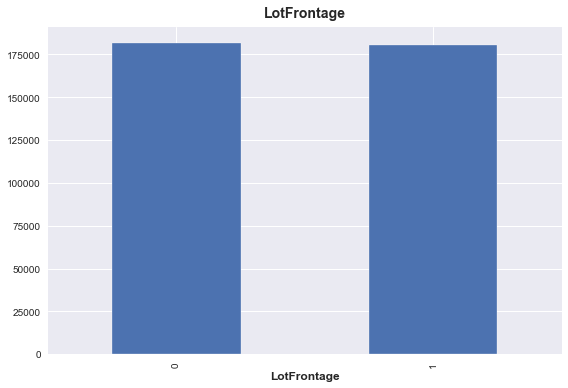

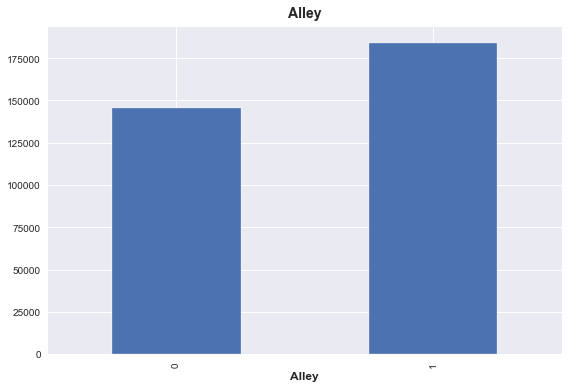

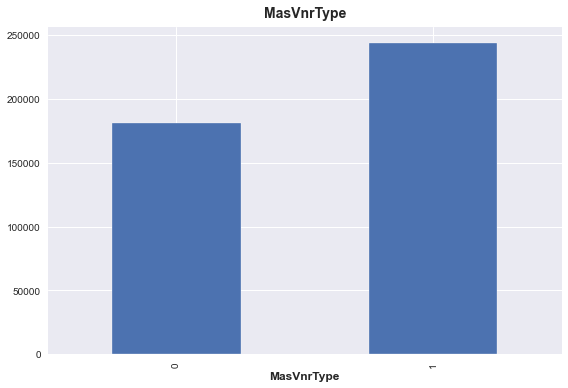

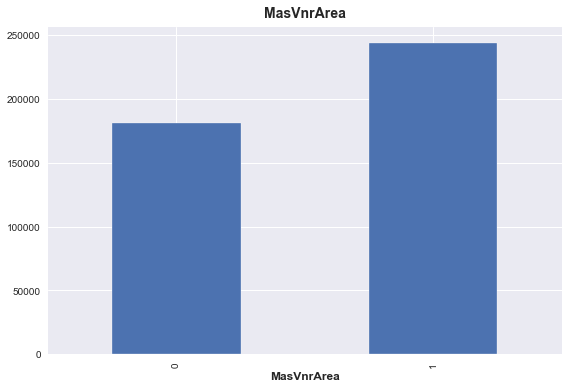

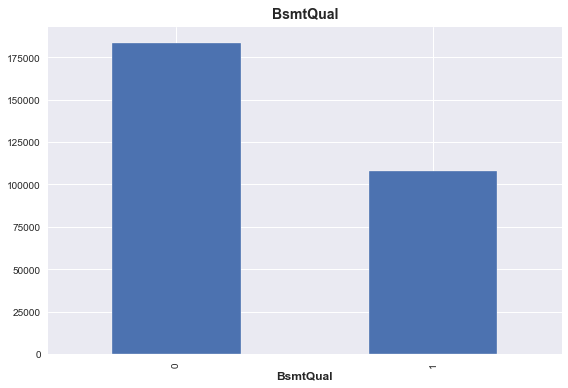

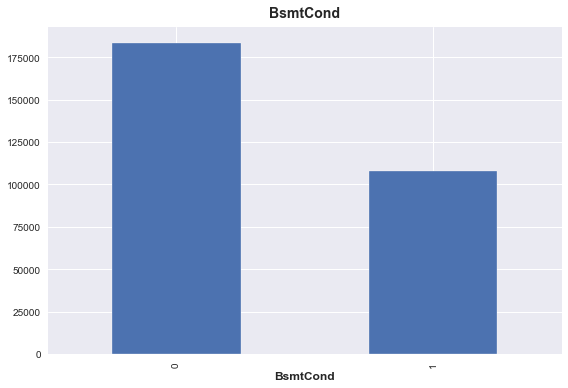

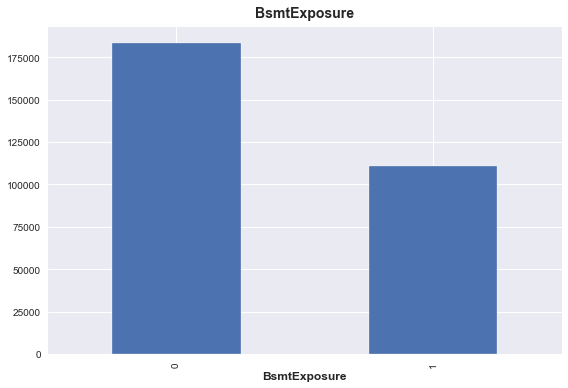

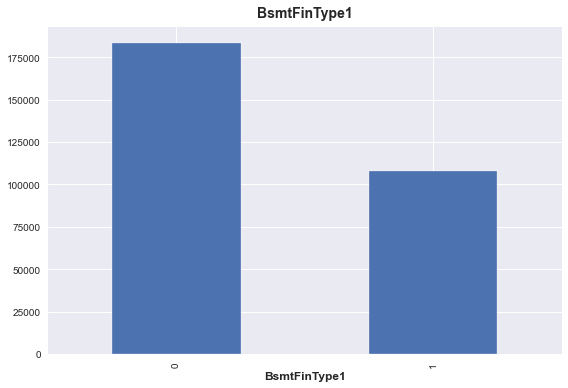

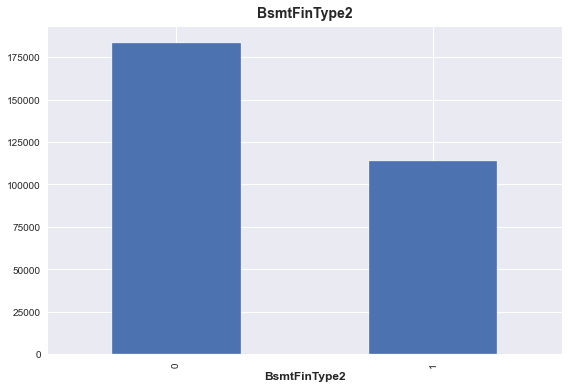

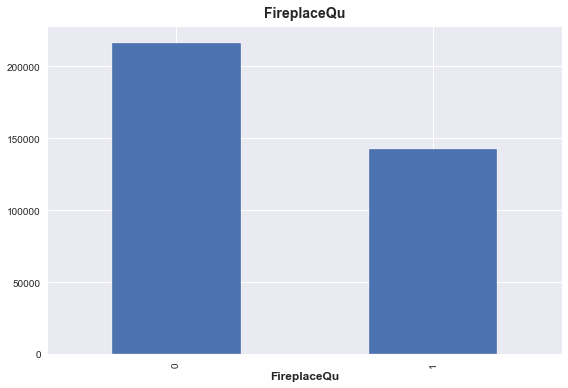

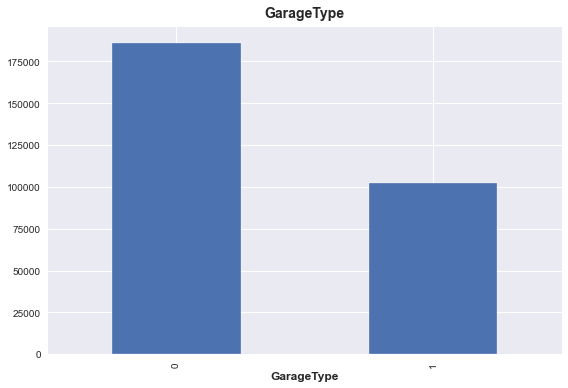

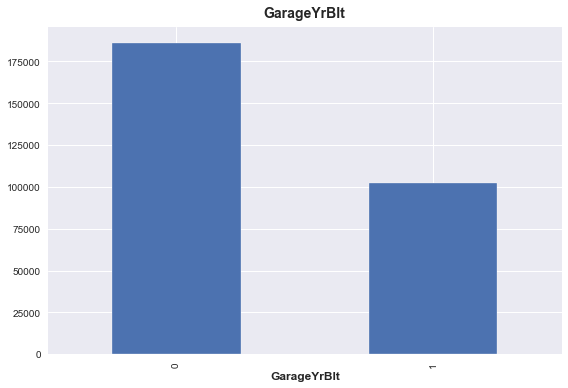

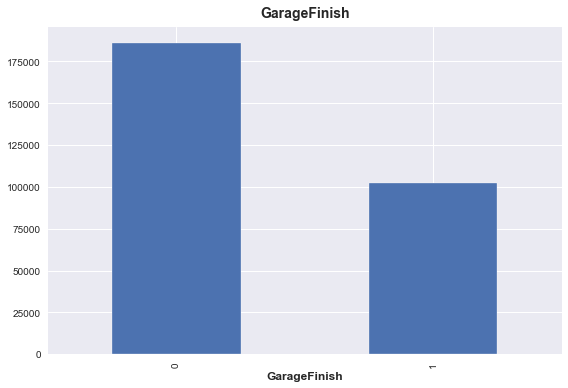

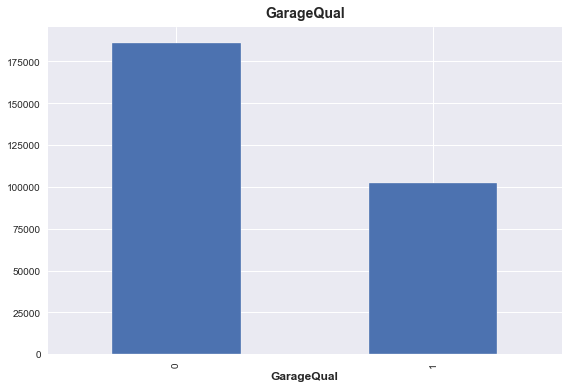

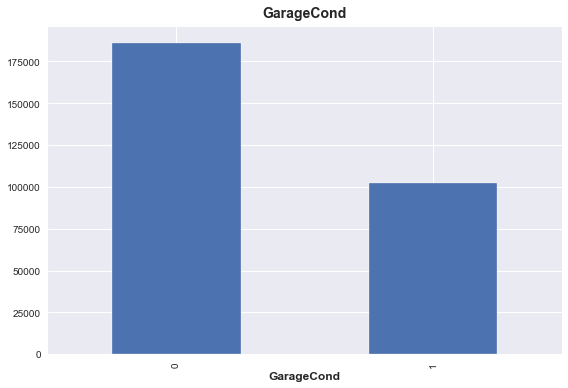

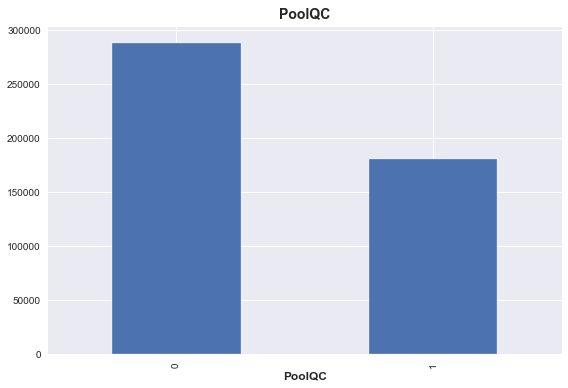

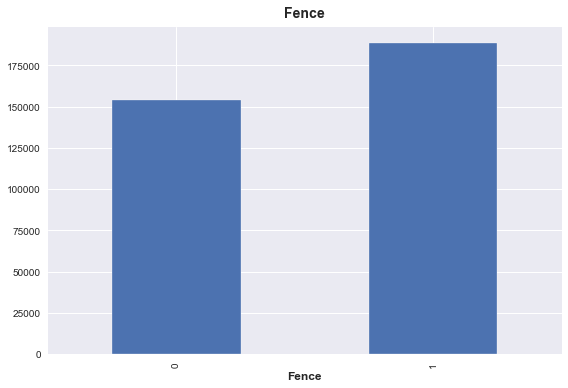

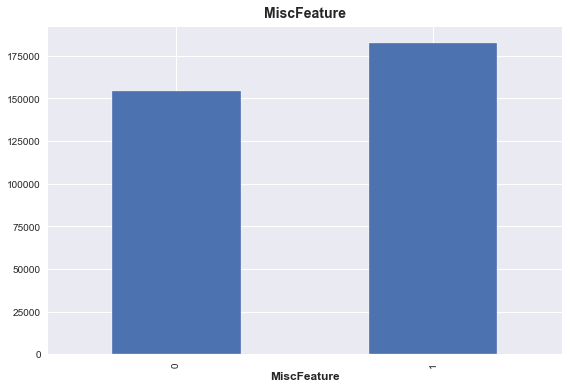

In [86]:
for feature in feautres_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),1,0) # replacing missing value with 1 and rest with 0
    data.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature)
    plt.show()

In [87]:
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']
numerical_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [88]:
df[numerical_features].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120          NaN     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          1976         0.0         120  ...           0          205   
1          1970         0.0         351  ...          81          207   
2          1997         0.0         862  ...         180          130   
3          1977       480.0         705  ...           0          122   
4          2000       126.0        1246  ...         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000  

[5 rows x 38 columns]

In [89]:
year_features = [features for features in numerical_features if "Yr" in features or "Year" in features]
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

<AxesSubplot:xlabel='YrSold'>

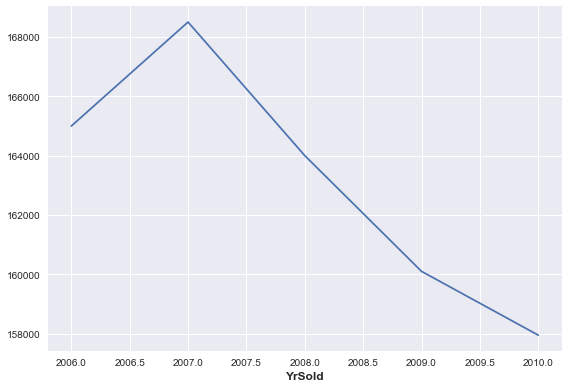

In [90]:
df.groupby('YrSold')['SalePrice'].median().plot()

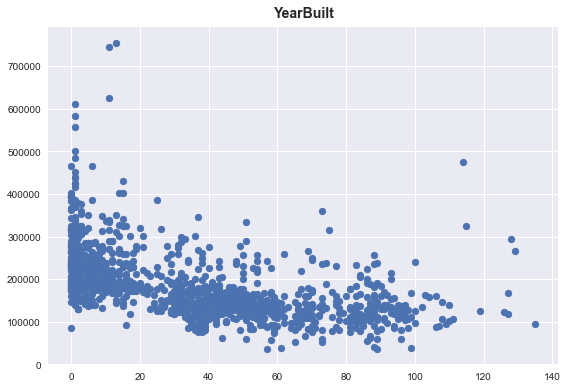

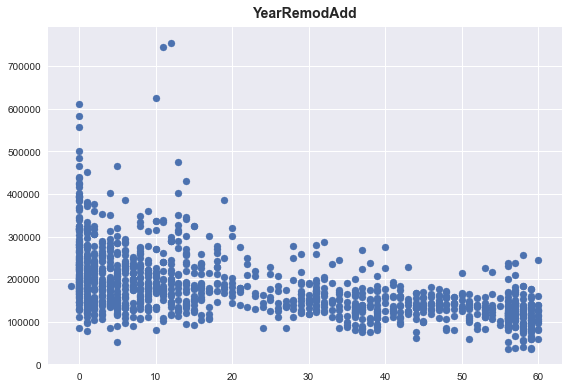

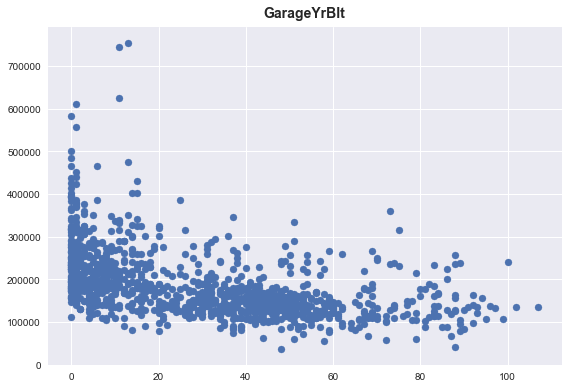

In [91]:
for feature in year_features:
    if feature != "YrSold":
        data = df.copy()
        data[feature] = data['YrSold'] - data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.show()

In [92]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_features]
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [93]:
df[discrete_features].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0         120            6            5             0             0   
1          20            8            6             0             1   
2          60            7            5             0             1   
3          20            6            6             0             0   
4          20            6            7             0             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         0             2             1             5   
1             0         2         0             4             1             8   
2             0         2         1             3             1             8   
3             0         2         0             3             1             7   
4             1         2         0             3             1             8   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           1           2          0         0        0       2  
1           1           2          0         0        0      10  
2           1           2          0         0        0       6  
3           1           2          0         0        0       1  
4           1           2          0         0        0       6

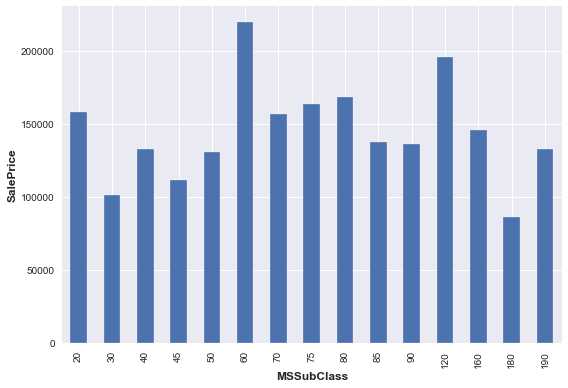

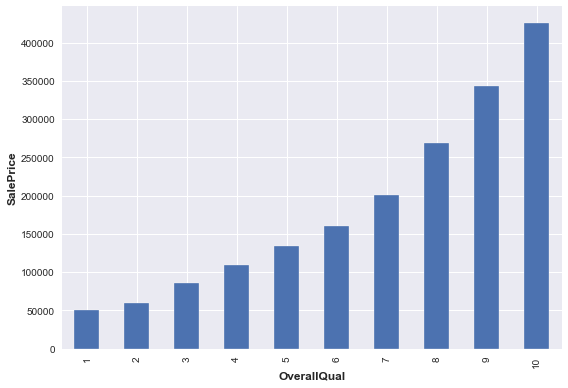

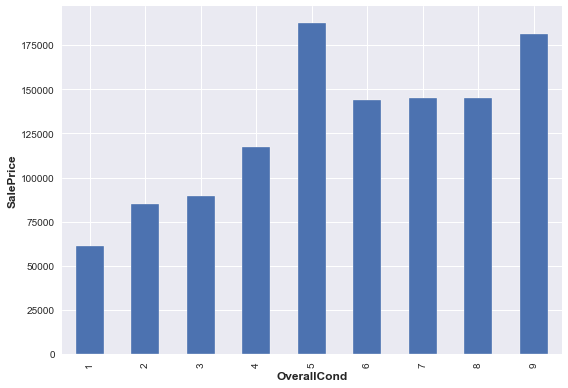

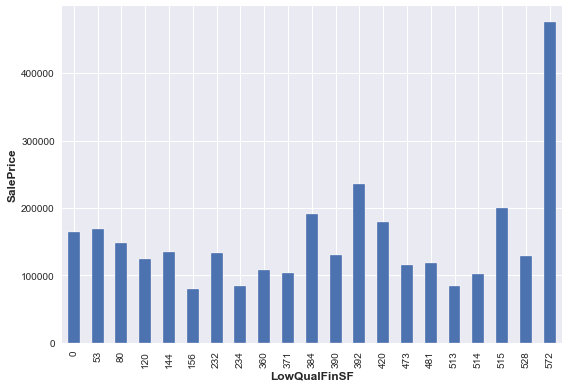

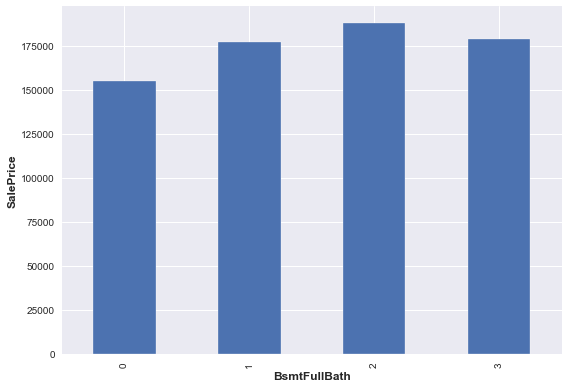

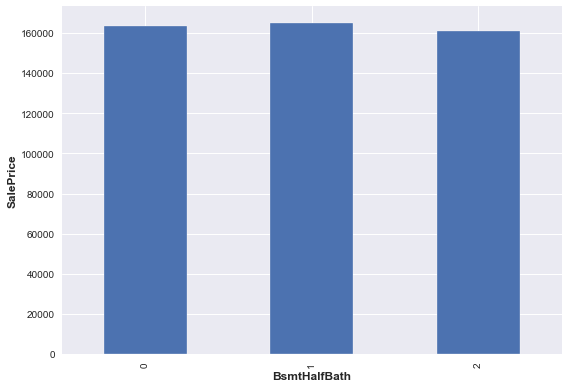

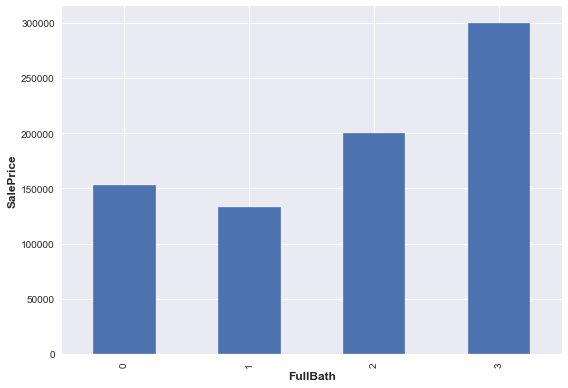

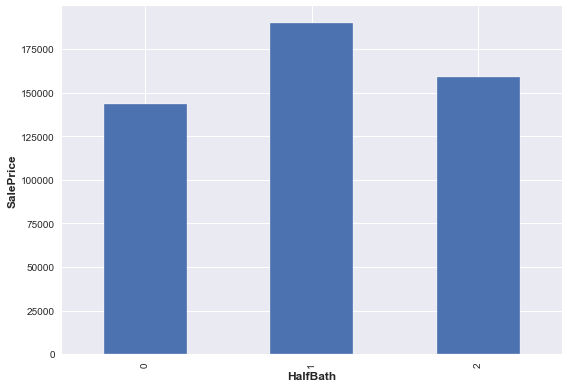

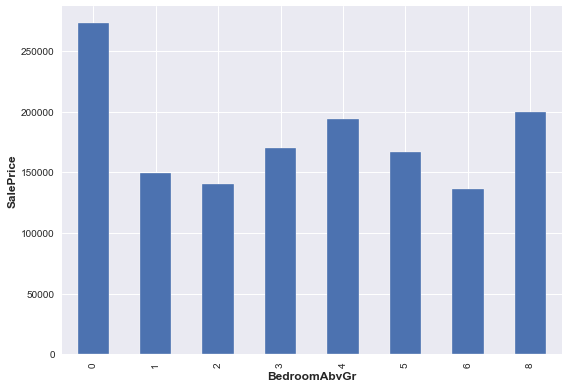

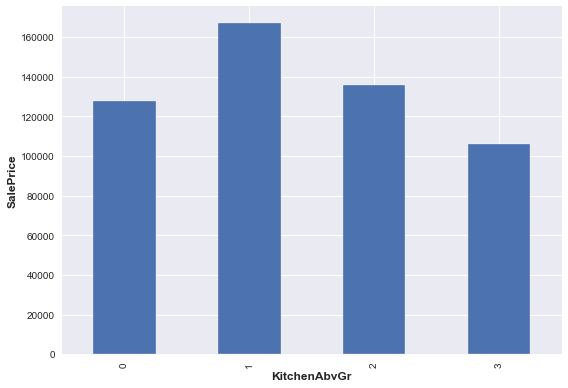

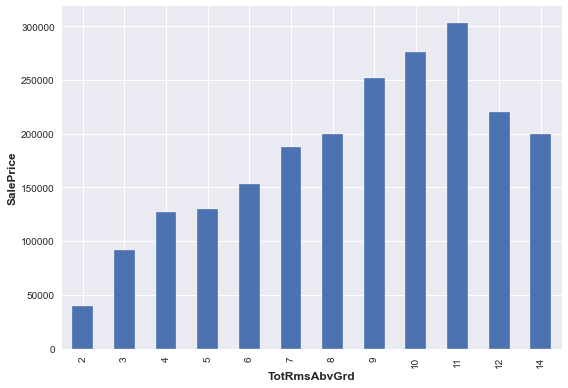

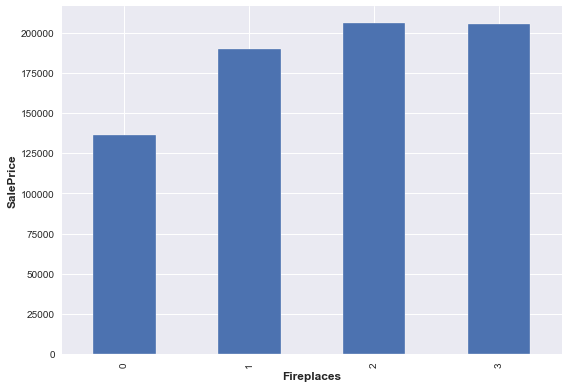

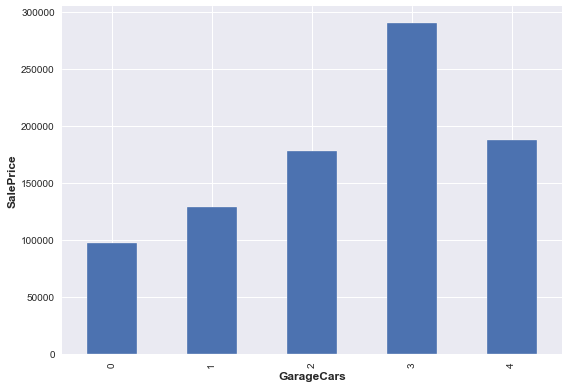

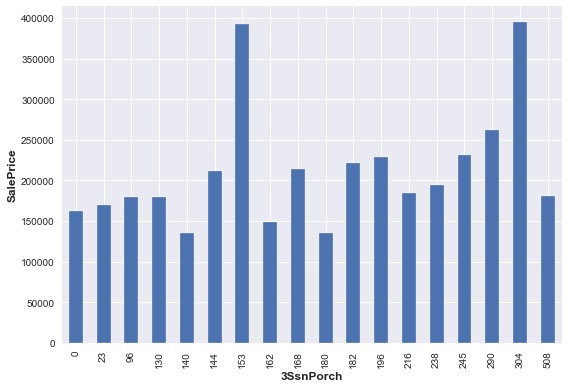

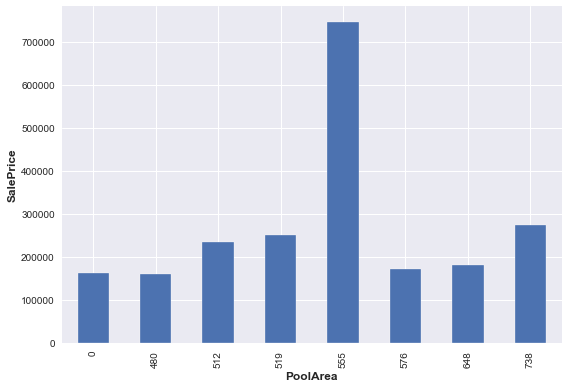

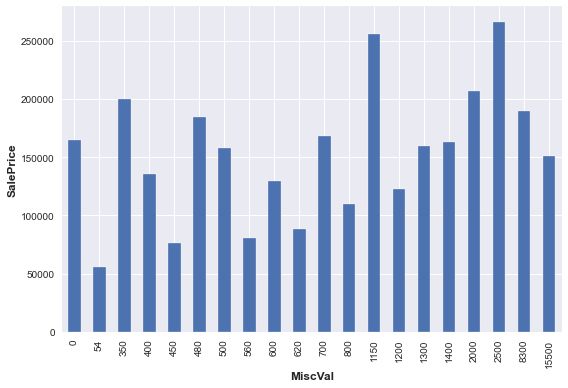

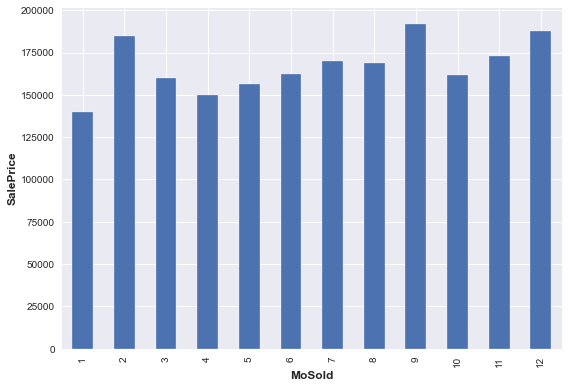

In [94]:
for feature in discrete_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [95]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features+year_features+['Id']]
continous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

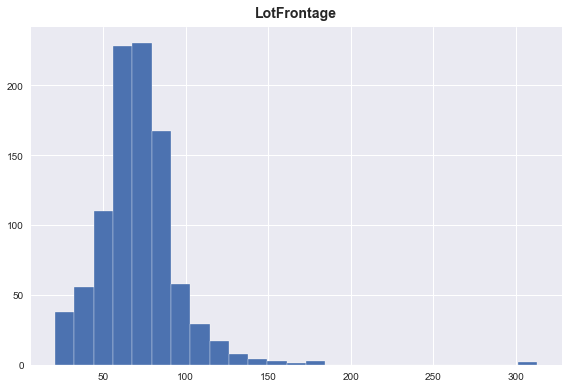

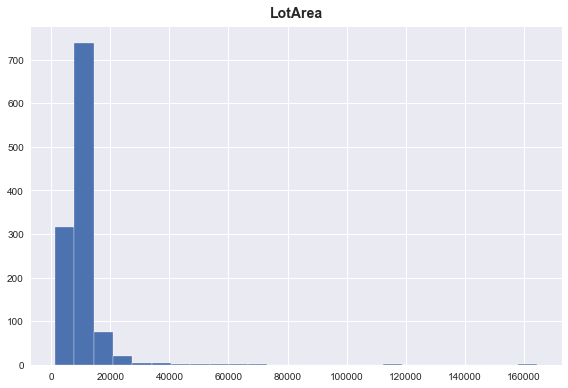

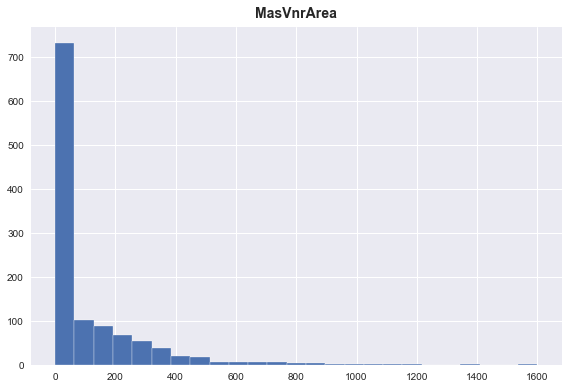

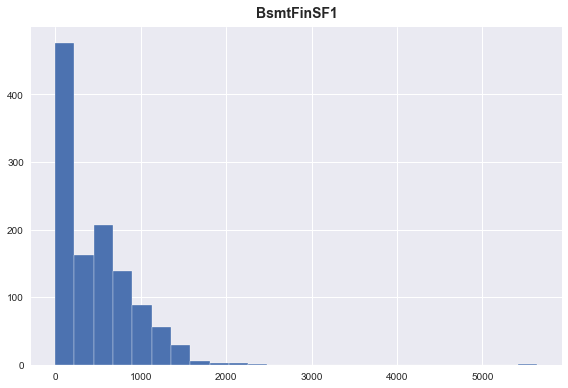

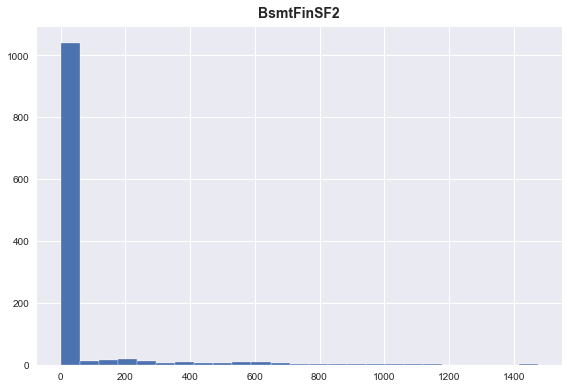

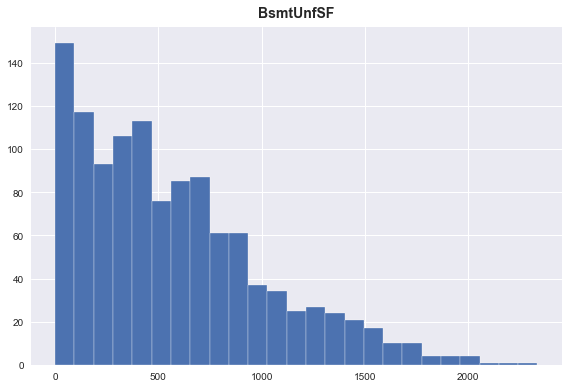

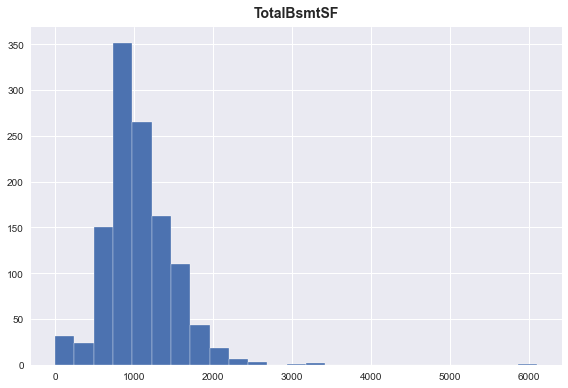

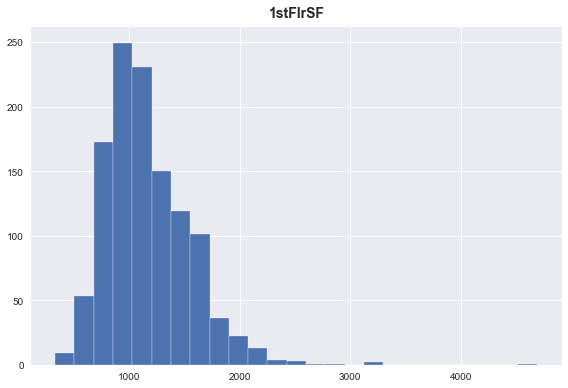

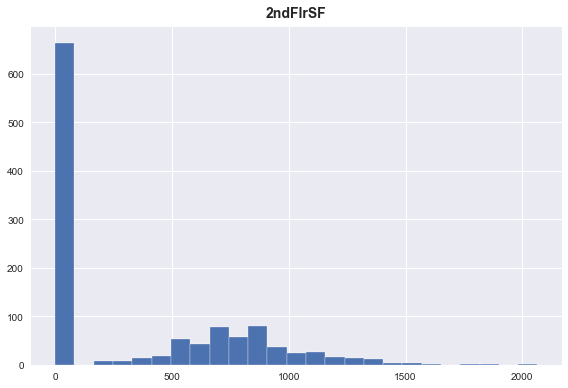

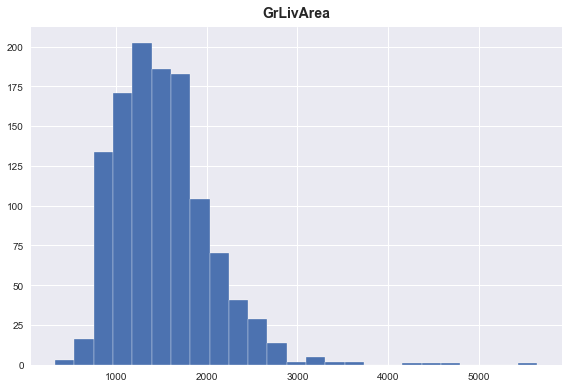

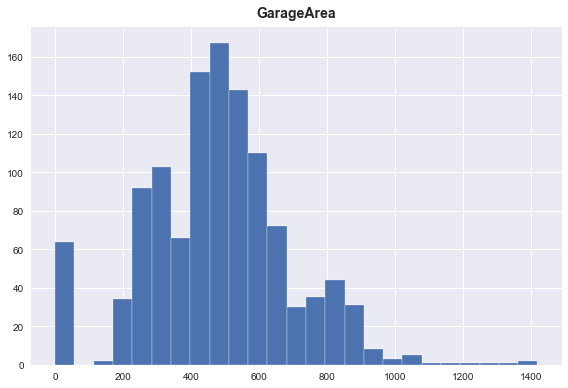

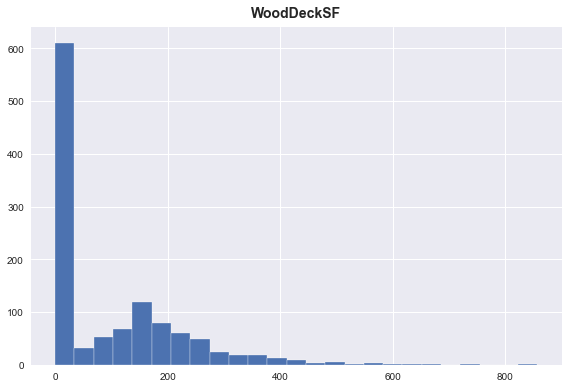

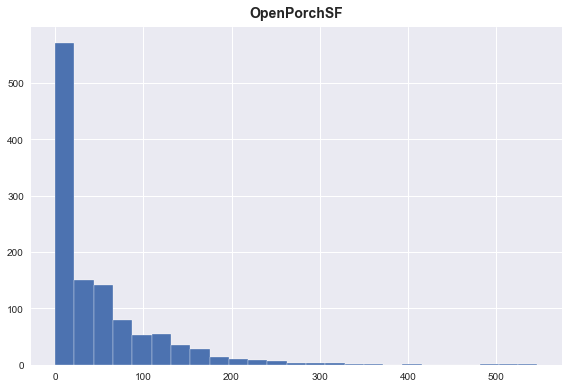

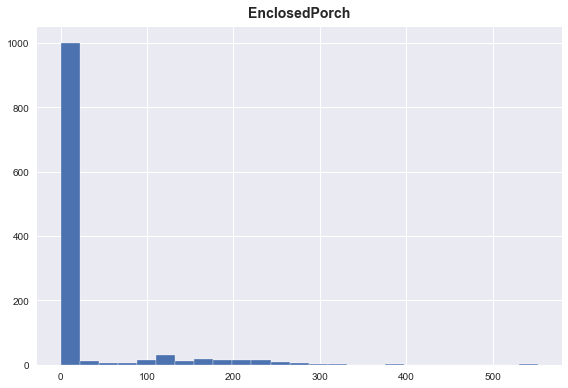

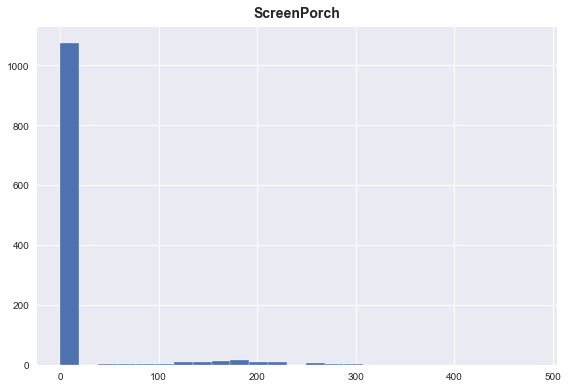

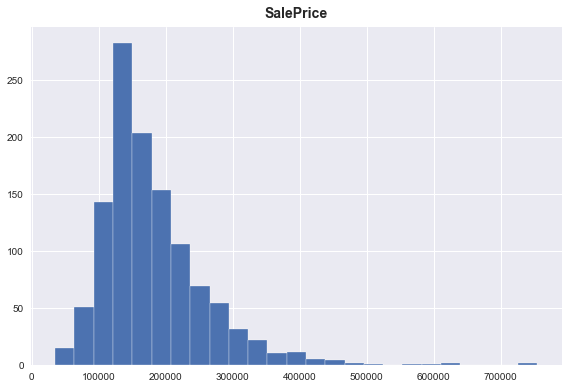

In [96]:
for feature in continous_features:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.title(feature)
    
    plt.show()

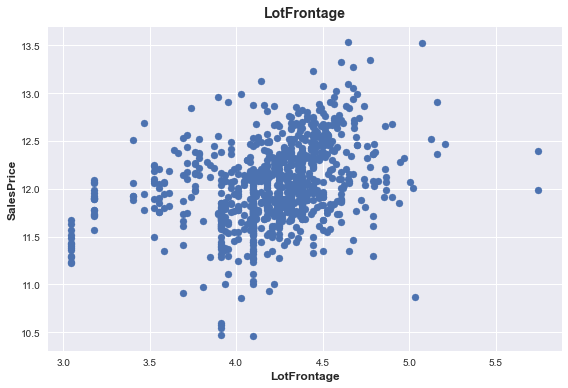

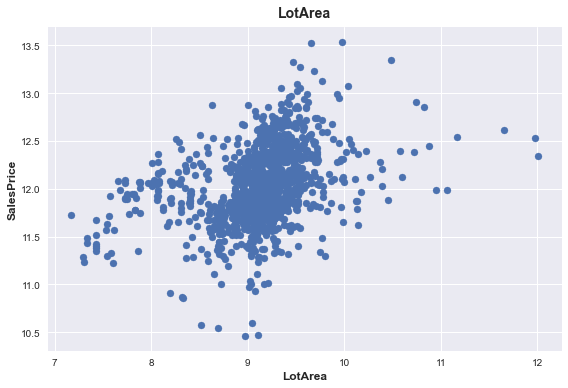

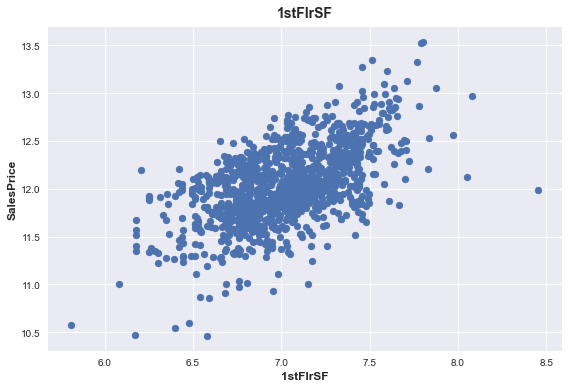

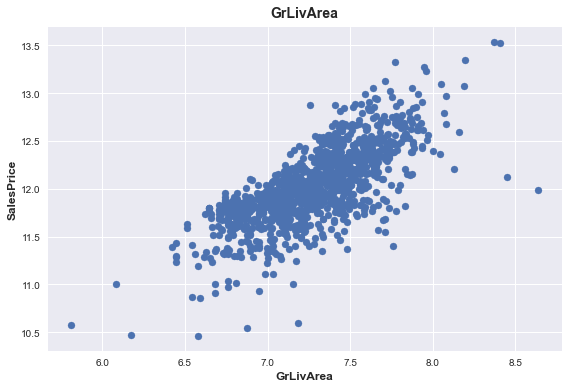

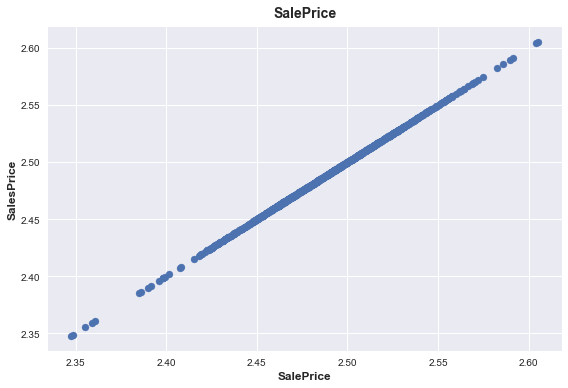

In [97]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

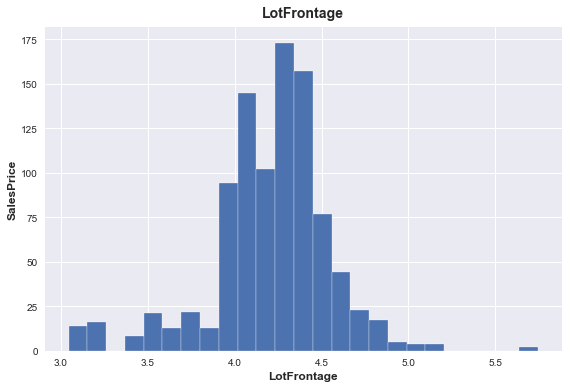

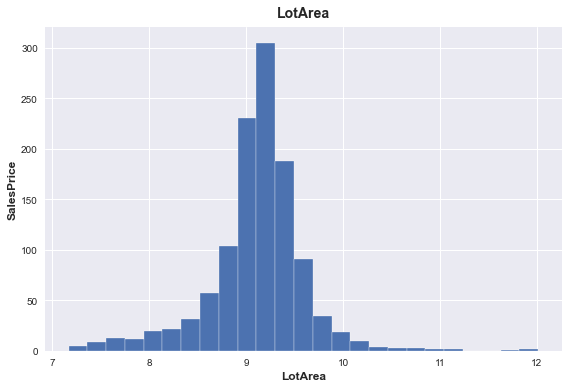

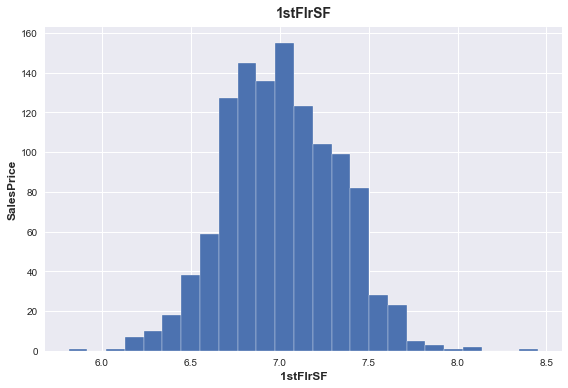

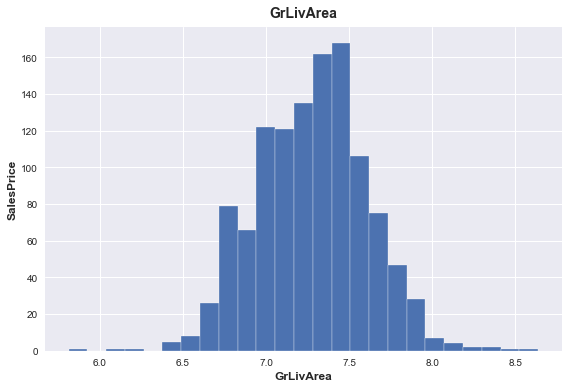

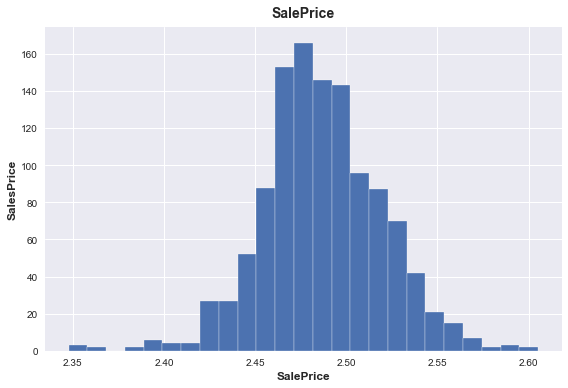

In [98]:
for feature in continous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])
        #plt.scatter(data[feature],data['SalePrice'])
        data[feature].hist(bins = 25)
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

In [99]:
categorical_features =[feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [100]:
for feature in categorical_features:
    print("Distinct categories for {}  are {}".format(feature,len(df[feature].unique())))

Distinct categories for MSZoning  are 5
Distinct categories for Street  are 2
Distinct categories for Alley  are 3
Distinct categories for LotShape  are 4
Distinct categories for LandContour  are 4
Distinct categories for Utilities  are 1
Distinct categories for LotConfig  are 5
Distinct categories for LandSlope  are 3
Distinct categories for Neighborhood  are 25
Distinct categories for Condition1  are 9
Distinct categories for Condition2  are 8
Distinct categories for BldgType  are 5
Distinct categories for HouseStyle  are 8
Distinct categories for RoofStyle  are 6
Distinct categories for RoofMatl  are 8
Distinct categories for Exterior1st  are 14
Distinct categories for Exterior2nd  are 15
Distinct categories for MasVnrType  are 5
Distinct categories for ExterQual  are 4
Distinct categories for ExterCond  are 5
Distinct categories for Foundation  are 6
Distinct categories for BsmtQual  are 5
Distinct categories for BsmtCond  are 5
Distinct categories for BsmtExposure  are 5
Distinct 

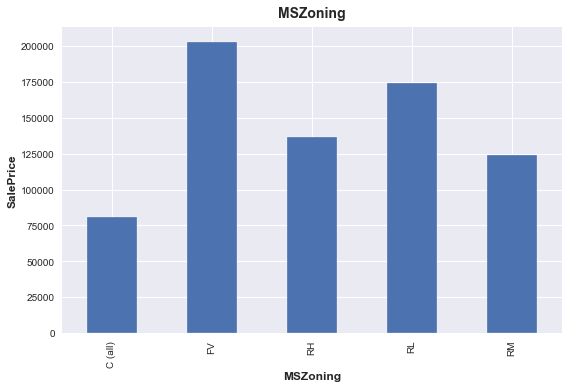

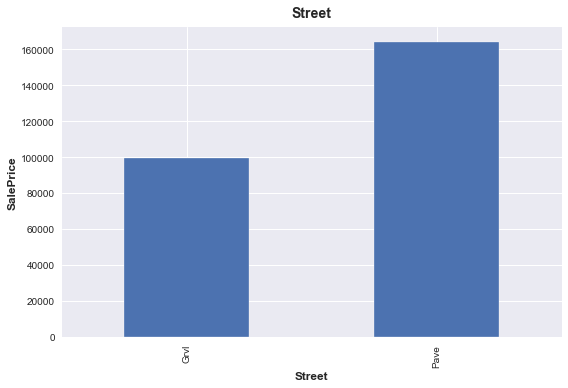

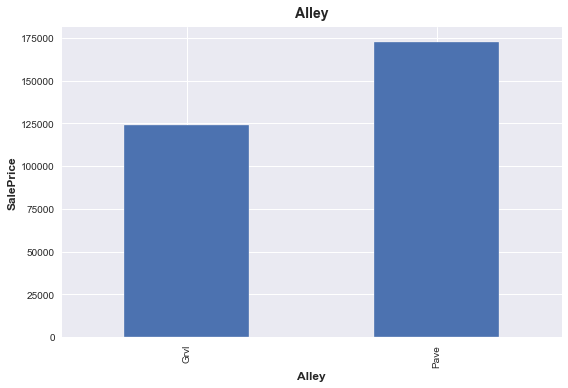

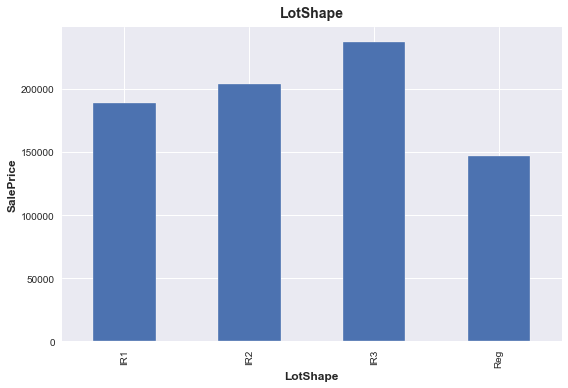

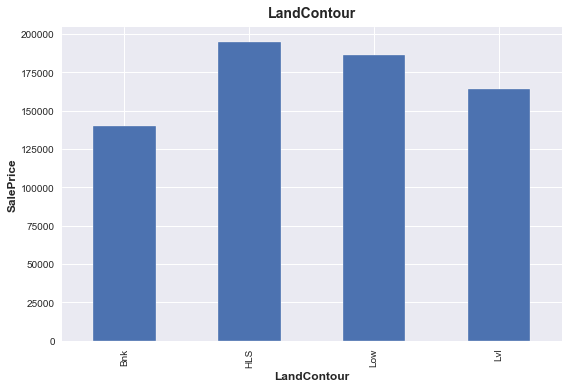

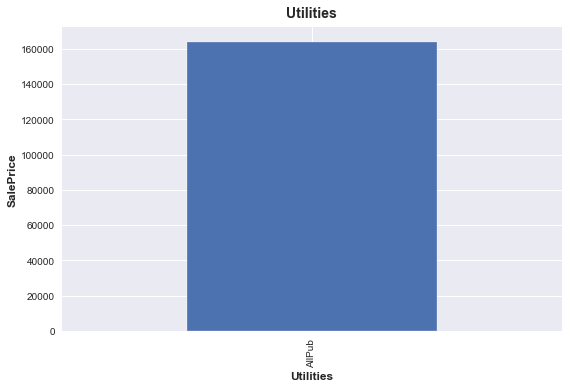

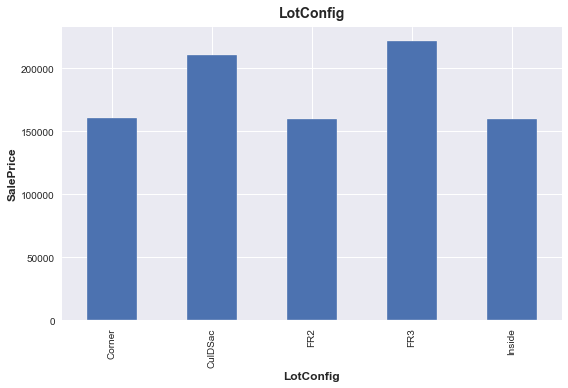

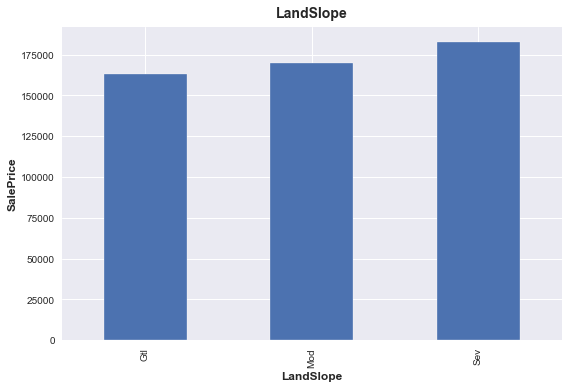

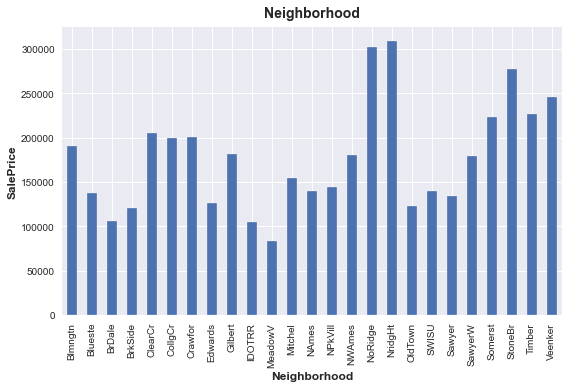

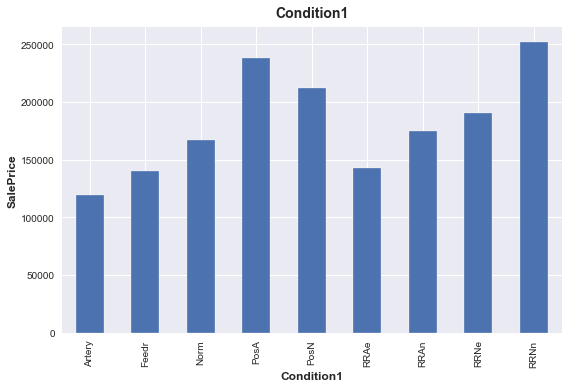

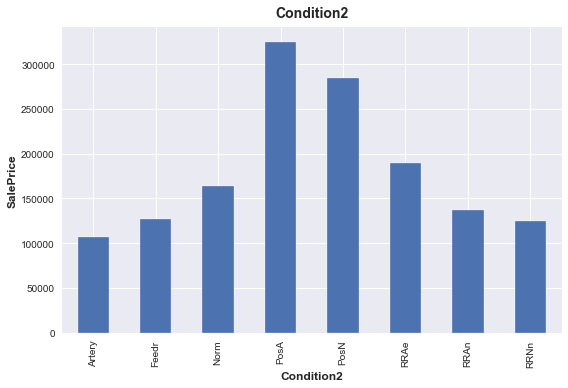

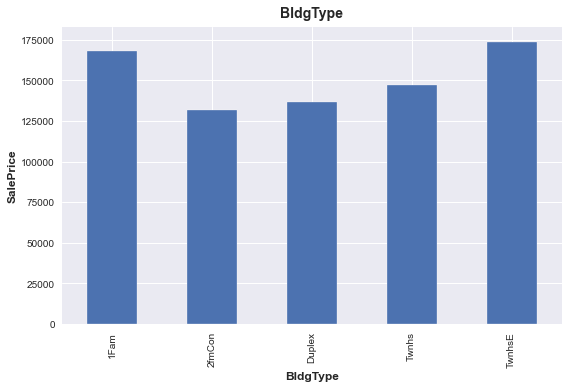

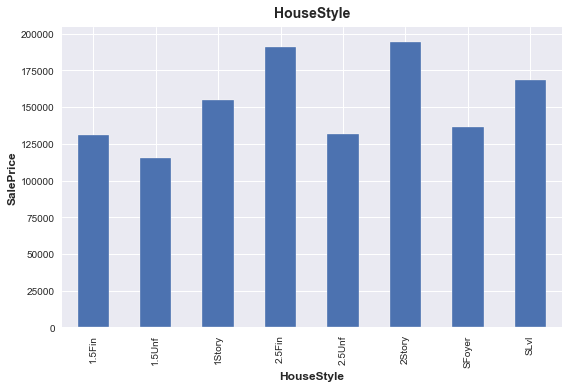

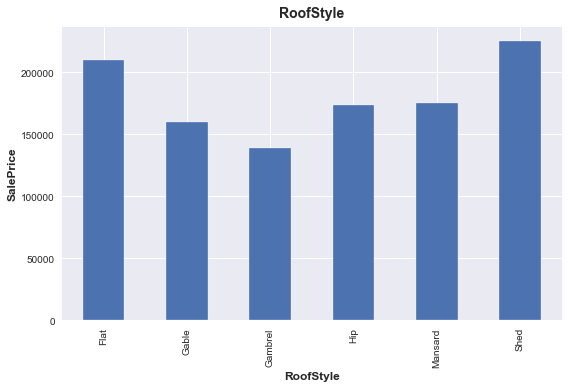

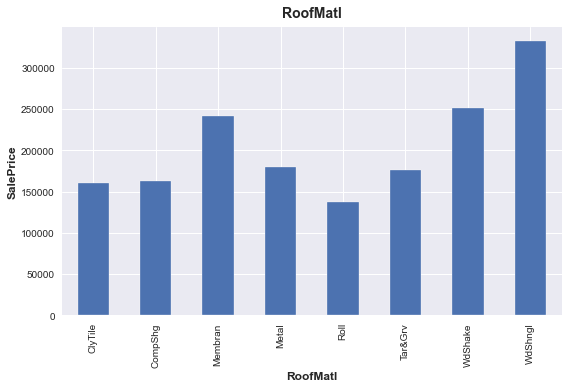

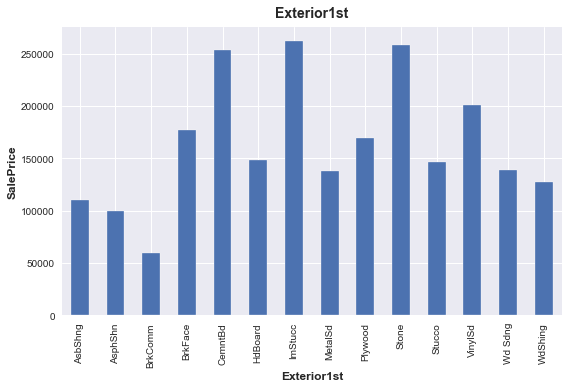

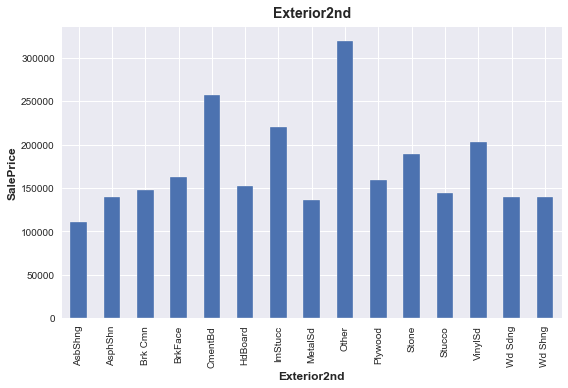

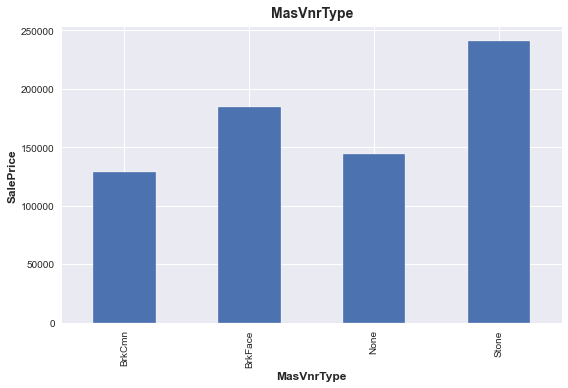

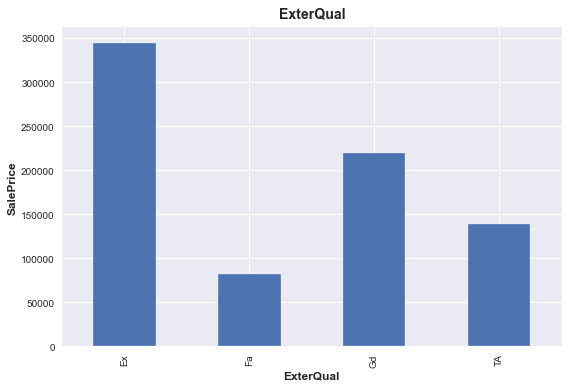

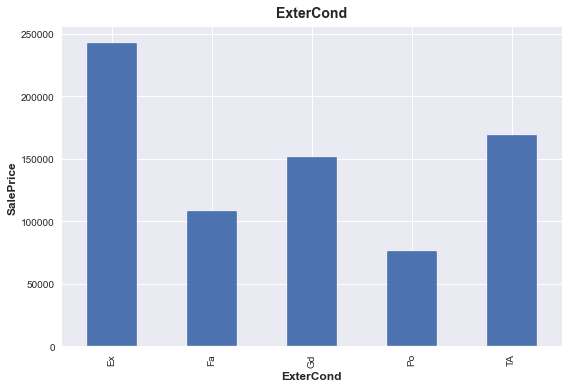

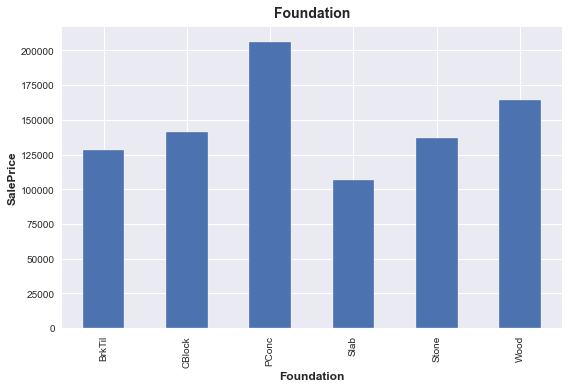

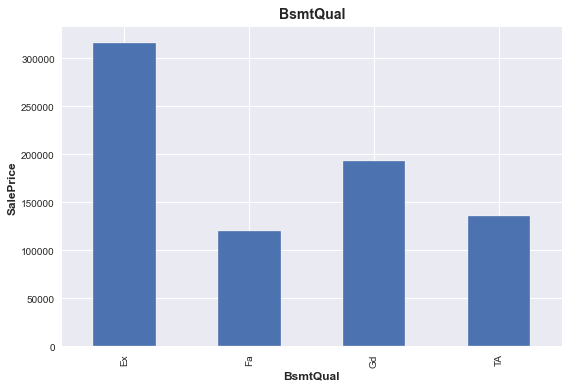

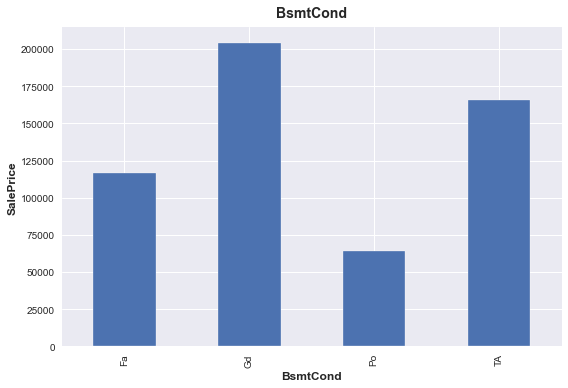

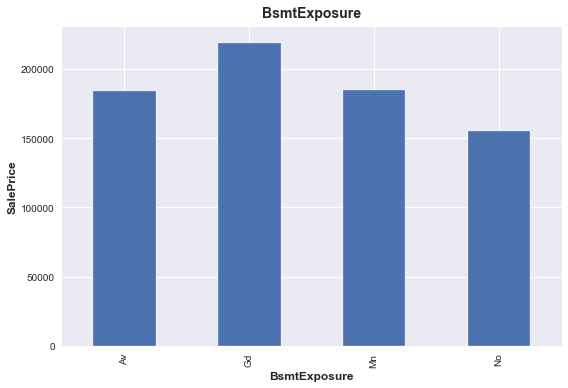

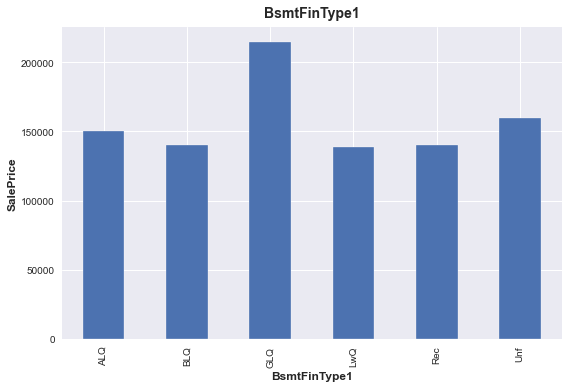

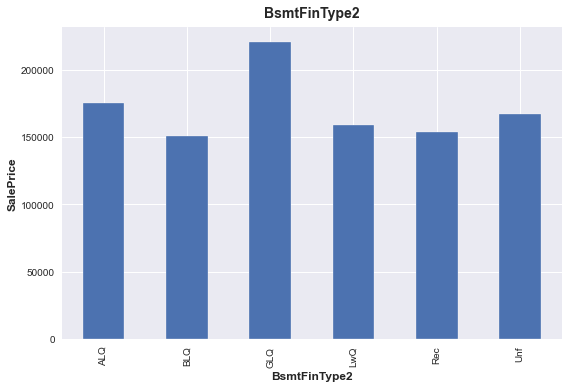

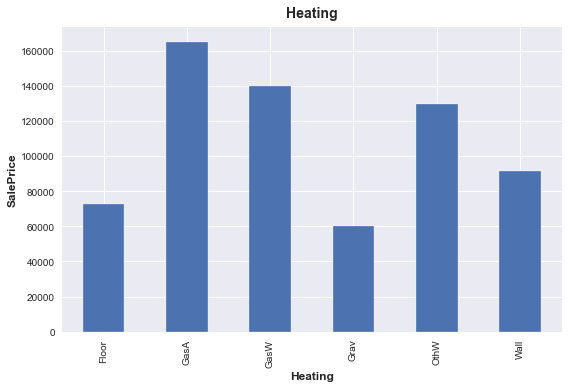

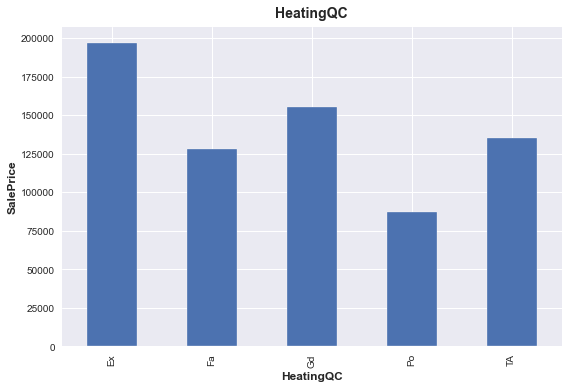

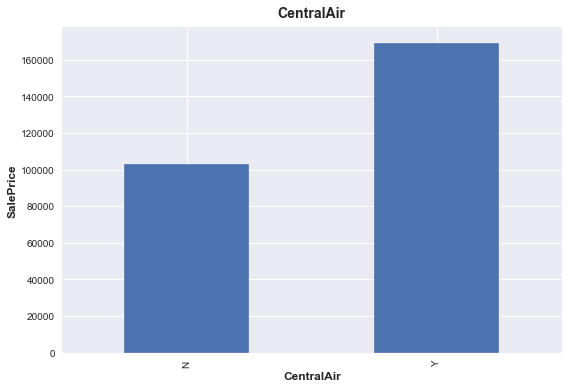

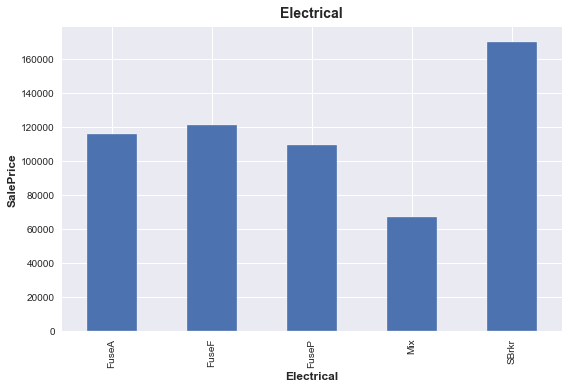

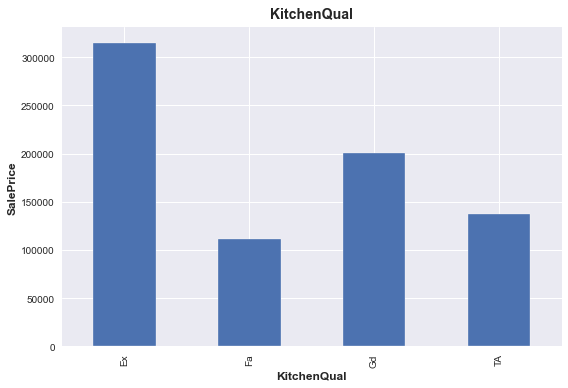

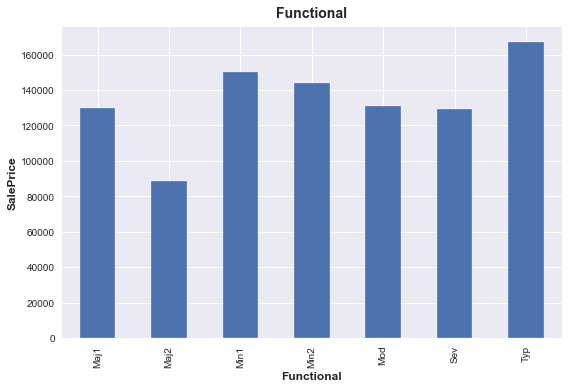

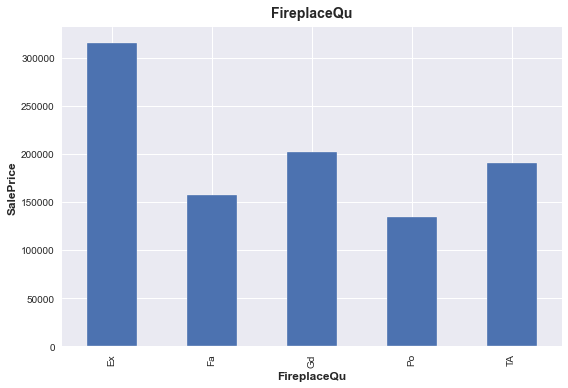

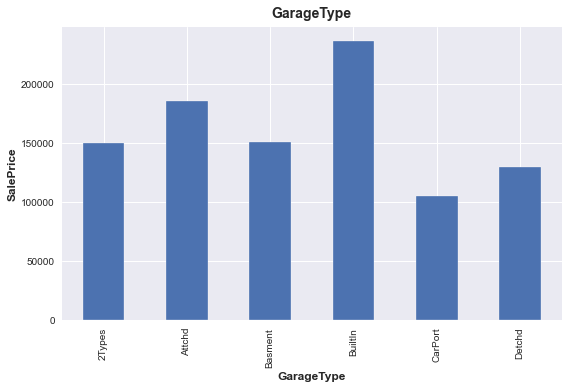

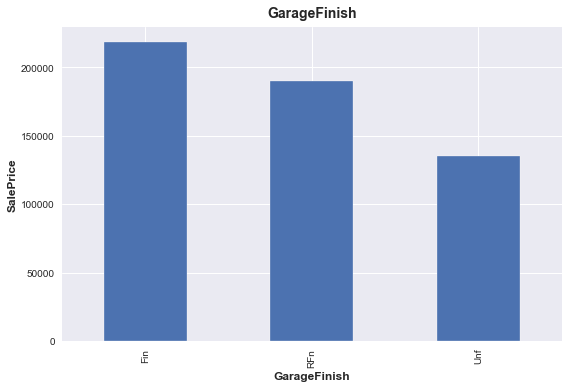

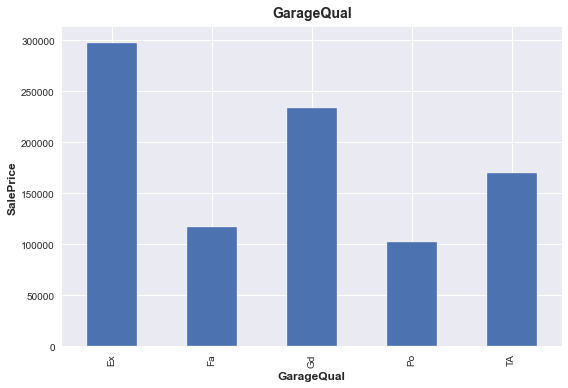

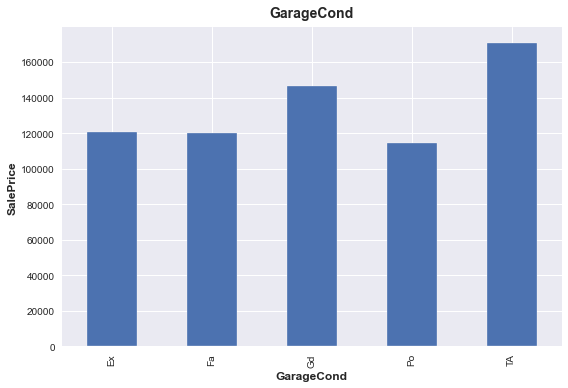

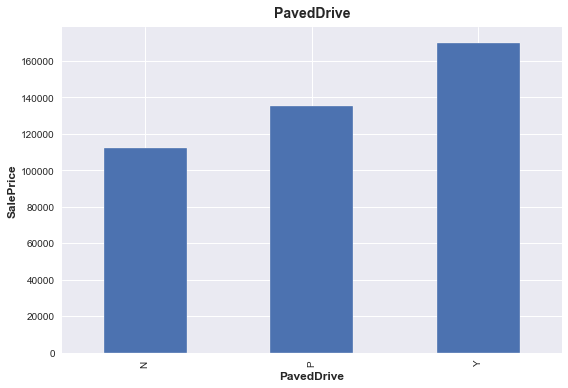

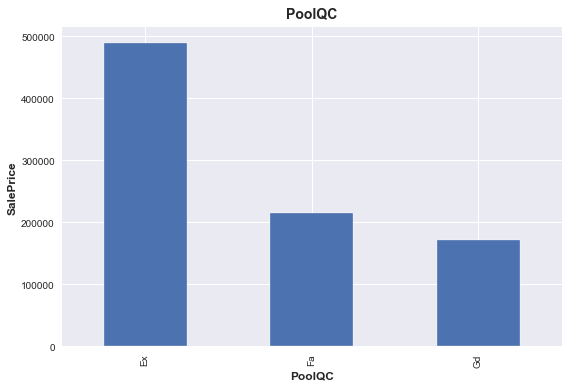

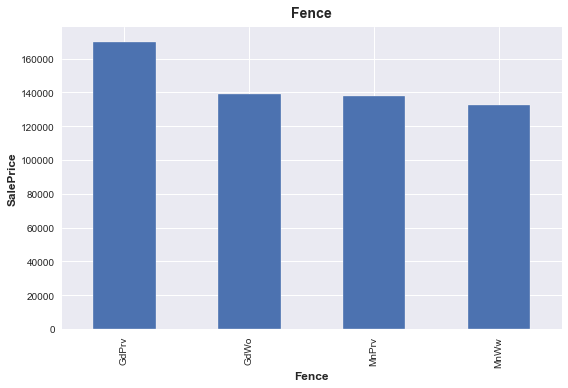

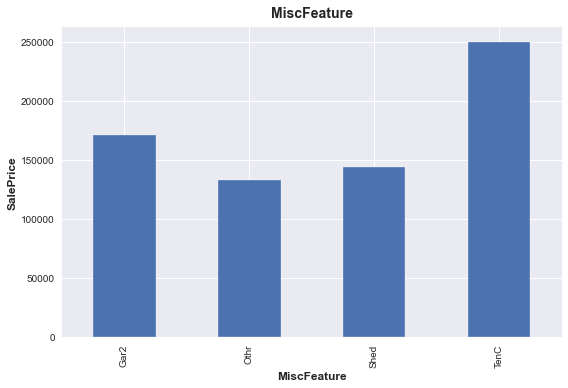

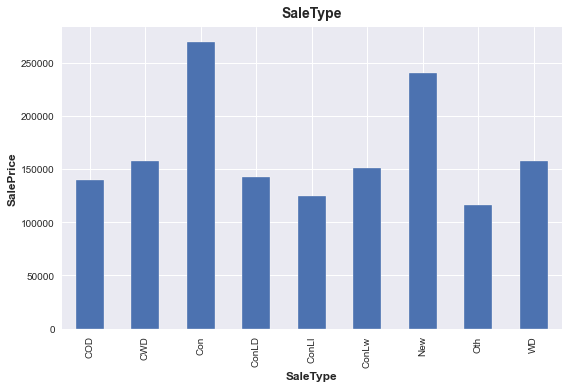

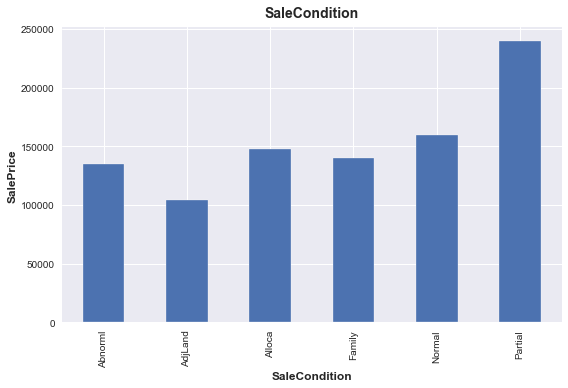

In [101]:
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Testing Dataset

In [102]:
df=pd.read_csv("test housing.csv")

In [103]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

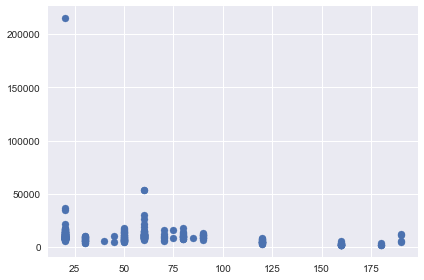

In [105]:
plt.scatter(df['MSSubClass'],df['LotArea'])

In [106]:
x=df[['MSSubClass','LotArea']]
y=df['LotArea']

In [107]:
x

MSSubClass  LotArea
0            20    14157
1           120     5814
2            20    11838
3            70    12000
4            60    14598
..          ...      ...
287          20    10206
288          20     9245
289          20    11241
290          50     5000
291         160     1953

[292 rows x 2 columns]

In [108]:
y

0      14157
1       5814
2      11838
3      12000
4      14598
       ...  
287    10206
288     9245
289    11241
290     5000
291     1953
Name: LotArea, Length: 292, dtype: int64

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [110]:
len(x)

292

In [111]:
len(x_train)

204

In [112]:
len(x_test)

88

In [113]:
x_test

MSSubClass  LotArea
248          80    13825
232          30     5400
114          50     7200
16           20     8780
85           75    15863
..          ...      ...
122          60    11170
58           90     8472
206          60    10625
124          50    10930
31           20    10083

[88 rows x 2 columns]

In [114]:
len(x_train)

204

In [115]:
x_train

MSSubClass  LotArea
78           20    13265
56           50     6240
120         180     1526
161          80     7937
104          60     7500
..          ...      ...
209         160     2522
184          20    15431
117          60    10852
100          60     9375
105          90     6979

[204 rows x 2 columns]

In [116]:
y_test

248    13825
232     5400
114     7200
16      8780
85     15863
       ...  
122    11170
58      8472
206    10625
124    10930
31     10083
Name: LotArea, Length: 88, dtype: int64

In [117]:
y_train

78     13265
56      6240
120     1526
161     7937
104     7500
       ...  
209     2522
184    15431
117    10852
100     9375
105     6979
Name: LotArea, Length: 204, dtype: int64

In [118]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [119]:
x_test

MSSubClass  LotArea
248          80    13825
232          30     5400
114          50     7200
16           20     8780
85           75    15863
..          ...      ...
122          60    11170
58           90     8472
206          60    10625
124          50    10930
31           20    10083

[88 rows x 2 columns]

In [120]:
clf.predict(x_test)

array([13825.,  5400.,  7200.,  8780., 15863., 11900.,  1953.,  3964.,
       12394., 53107.,  6600., 18030.,  8405.,  5119.,  3735.,  7340.,
        4388., 11700.,  5825.,  7200.,  7500., 12011.,  9819., 14115.,
        4500., 10998., 10004.,  9600., 12137.,  2117., 11428., 14145.,
        1680.,  9675.,  8775.,  7875., 13286.,  7500.,  2217., 18800.,
       11362.,  4500.,  9060.,  9849., 12456.,  6853., 14948.,  4500.,
        6792., 10530.,  9037.,  7677.,  9967.,  9750.,  9560.,  6762.,
       15660., 12800., 11340.,  9200.,  8070.,  7052., 26178., 11143.,
       14598., 21750.,  5232., 12702., 17871.,  3675., 13695.,  8450.,
       15426., 29959., 11317., 10215.,  9100.,  8500.,  2665.,  8049.,
        6324., 17120.,  3182., 11170.,  8472., 10625., 10930., 10083.])

In [121]:
y_test

248    13825
232     5400
114     7200
16      8780
85     15863
       ...  
122    11170
58      8472
206    10625
124    10930
31     10083
Name: LotArea, Length: 88, dtype: int64

In [122]:
clf.score(x_test,y_test)

1.0

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)
x_test

MSSubClass  LotArea
170          20     7024
113          60    53107
230          50     9060
127          20    17920
251          60    12552
..          ...      ...
275          20     8450
126          20     7200
98           60     9965
20           70     9000
38           60    12936

[88 rows x 2 columns]

In [124]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [125]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [126]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [127]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [129]:
from sklearn.naive_bayes import GaussianNB
gnb = KNeighborsClassifier()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

In [130]:
# Importing basic packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Importing Sklearn module and classes
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [131]:
iris = datasets.load_iris()
x = iris.data[:, [0, 2]]
Y = iris.target

In [135]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [137]:
# Create an instance of LogisticRegression classifier
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
 
# Fit the model
#
lr.fit(x_train_std, y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

In [138]:
# Create the predictions

y_predict = lr.predict(x_test_std)
 
# Use metrics.accuracy_score to measure the score
print("LogisticRegression Accuracy %.3f" %metrics.accuracy_score(y_test, y_predict))

LogisticRegression Accuracy 0.011
